## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from catboost import CatBoostRegressor
import shap
from lightgbm import LGBMRegressor

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [4]:
df_calidad_aire_07=pd.read_csv('data/datos07.csv',sep=';')
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=pd.concat([df_calidad_aire_07, df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15],axis=0,ignore_index=True)

In [5]:
df_temperatura_07=pd.read_csv('data/temp_2007.csv')
df_temperatura_08=pd.read_csv('data/temp_2008.csv')
df_temperatura_09=pd.read_csv('data/temp_2009.csv')
df_temperatura_10=pd.read_csv('data/temp_2010.csv')
df_temperatura_11=pd.read_csv('data/temp_2011.csv')
df_temperatura_12=pd.read_csv('data/temp_2012.csv')
df_temperatura_13=pd.read_csv('data/temp_2013.csv')
df_temperatura_14=pd.read_csv('data/temp_2014.csv')
df_temperatura_15=pd.read_csv('data/temp_2015.csv')
df_temperatura=pd.concat([df_temperatura_07, df_temperatura_08,df_temperatura_09,df_temperatura_10,df_temperatura_11,df_temperatura_12,df_temperatura_13,df_temperatura_14,df_temperatura_15],axis=0,ignore_index=True)

## Análisis exploratorio

In [6]:
df.head()

Año  Hospital Recodificado  Comunidad Autónoma  Provincia  Grupo Hospital  \
0  2013    -398345888794880068                  13         28               4   
1  2013   -3959599681650518086                  13         28               3   
2  2013   -3959599681650518086                  13         28               3   
3  2013  -1468647043-245326524                  13         28               4   
4  2013   946141513-1168024764                  13         28               3   

   Grupo Cluster Historia Recodificada       CIP Recodificado  \
0              4  -1687781257578748014   -320943158-171303395   
1              4    166370745435838543     648485069584850511   
2              4    183632305468848809   899288196-1988273609   
3              5   2877111881585847151  -961279109-1723117644   
4              3  17519509571482774643     -33451060035352825   

   Fecha de nacimiento  Sexo  Provincia Residencia  Régimen Financiación  \
0             10041944     1                    28                     1   
1             10061937     1                    28                     1   
2             14111923     1                    28                     1   
3             10051956     2                    28                     1   
4              7091928     1                    28                     1   

   Fecha de ingreso  Tipo Ingreso  Fecha de alta  Tipo Alta  Estancia  \
0          30102013             1       13112013          1        14   
1          19032013             1       25032013          1         6   
2          15112013             1       26112013          1        11   
3          28042013             1       14052013          1        16   
4           7022013             2        8022013          1         1   

  Diagnóstico Principal Diagnóstico 2 Diagnóstico 3 Diagnóstico 4  \
0                 428.0           NaN         276.1         276.8   
1                491.21           NaN        518.84         519.8   
2                 428.0           NaN        518.84         584.9   
3                 428.1           NaN        428.20        518.81   
4                 162.5           NaN           496         173.9   

  Diagnóstico 5 Diagnóstico 6 Diagnóstico 7 Diagnóstico 8 Diagnóstico 9  \
0        491.20         494.0        041.85        518.83         401.9   
1         305.1        V15.05         V46.2        600.00         V60.3   
2         516.8        491.22         585.9         416.8        403.90   
3        491.20         305.1         416.8         276.2         424.2   
4        600.90         414.8        414.01        250.00         272.0   

  Diagnóstico 10 Diagnóstico 11 Diagnóstico 12 Diagnóstico 13 Diagnóstico 14  \
0         427.31          553.3          V43.4         V15.82         V58.61   
1         V15.82            NaN            NaN            NaN            NaN   
2         250.00         427.31          274.9          426.4         600.00   
3         414.10            NaN            NaN            NaN            NaN   
4          401.9         V15.82         V45.81         V45.61         V10.83   

   Fecha de Intervención Procedimiento 1 Procedimiento 2 Procedimiento 3  \
0                    NaN           39.96           99.21           93.96   
1                    NaN           90.42           87.44           87.44   
2                    NaN           90.42           87.44           87.44   
3                    NaN           88.72           87.44           89.37   
4                    NaN           33.26           33.24             NaN   

  Procedimiento 4 Procedimiento 5 Procedimiento 6 Procedimiento 7  \
0           89.39           90.59           91.39           90.42   
1           89.52           89.65           89.65             NaN   
2           89.52           89.65           88.72             NaN   
3           89.17           89.52             NaN             NaN   
4             NaN             NaN             NaN             NaN   

  Procedimi

In [7]:
df.tail()

Año Hospital Recodificado  Comunidad Autónoma  Provincia  \
140932  2014   -397825696459335749                  13         28   
140933  2014  -3959599681650518086                  13         28   
140934  2014   6786010821767932736                  13         28   
140935  2014   -398345888794880068                  13         28   
140936  2014   6785908421717601093                  13         28   

        Grupo Hospital  Grupo Cluster   Historia Recodificada  \
140932               3              4    15732651961347031435   
140933               3              4   1259742565-1684660259   
140934               2              3       82420401566747514   
140935               4              4  -1318909344-1737054105   
140936               4              5    -758230369-639741394   

             CIP Recodificado  Fecha de nacimiento  Sexo  \
140932  -148801774-1928770906              7111939     2   
140933  -12521883511529773304              9011954     2   
140934    4927991441436875167              7101953     1   
140935  2075399370-1949447169             19041951     1   
140936  -18336156992074847197              5111946     1   

        Provincia Residencia  Régimen Financiación  Fecha de ingreso  \
140932                    28                     1          23112013   
140933                    28                     1          10122013   
140934                    28                     1          31102014   
140935                    28                     1           3032014   
140936                    28                     1          29012014   

        Tipo Ingreso  Fecha de alta  Tipo Alta  Estancia  \
140932             1        7012014          1        45   
140933             1       10022014          4        62   
140934             1       18112014          1        18   
140935             1       15032014          4        12   
140936             1       14022014          1        16   

       Diagnóstico Principal Diagnóstico 2 Diagnóstico 3 Diagnóstico 4  \
140932                491.21        E878.1         519.8        518.84   
140933                   486           NaN        518.81         518.0   
140934                   486           NaN         510.9        511.89   
140935                   481           NaN        518.81        995.91   
140936                511.81           NaN        518.81         428.0   

       Diagnóstico 5 Diagnóstico 6 Diagnóstico 7 Diagnóstico 8 Diagnóstico 9  \
140932         511.9        786.30         276.1         276.7        415.12   
140933         511.9        733.13        516.36         276.2        733.00   
140934         494.1        491.21         511.9        518.81        799.02   
140935        491.21         511.9         276.2         584.9        518.89   
140936         162.5         196.1         197.2        255.10         584.9   

       Diagnóstico 10 Diagnóstico 11 Diagnóstico 12 Diagnóstico 13  \
140932          038.9         996.61         250.00          401.9   
140933          519.8         V10.11         V15.82          437.0   
140934          272.4          790.6         275.49         712.30   
140935          573.8          285.9          305.1         303.91   
140936         405.99         278.00            496         427.31   

       Diagnóstico 14  Fecha de Intervención Procedimiento 1 Procedimiento 2  \
140932         V45.82             17122013.0           37.87           33.22   
140933          V46.2              6022014.0           77.49           81.65   
140934          122.8              7112014.0           34.06           34.04   
140935         V12.54                    NaN           34.04           34.20   
140936          276.8             10022014.0           34.92           99.25   

       Procedimiento 3 Procedimiento 4 Procedimiento 5 Procedimiento 6  \
140932           99.21           87.41           88.43           88.72   
140933           33.24           90.42           91.32           88.93  

In [6]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [9]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [10]:
df.describe(include='all').T

count unique                  top    freq  \
año                    140937.0    NaN                  NaN     NaN   
hospital_recodificado    140937     34  -398345888794880068   16385   
comunidad_autónoma     140937.0    NaN                  NaN     NaN   
provincia              140937.0    NaN                  NaN     NaN   
grupo_hospital         140937.0    NaN                  NaN     NaN   
...                         ...    ...                  ...     ...   
nivel_mortalidad       140937.0    NaN                  NaN     NaN   
servicio                 140937      2                  NML  139565   
edad                   140937.0    NaN                  NaN     NaN   
reingreso              140937.0    NaN                  NaN     NaN   
coste                  140937.0    NaN                  NaN     NaN   

                              mean          std     min      25%      50%  \
año                    2011.504729     2.248531  2008.0   2010.0   2012.0   
hospital_recodificado          NaN          NaN     NaN      NaN      NaN   
comunidad_autónoma            13.0          0.0    13.0     13.0     13.0   
provincia                     28.0          0.0    28.0     28.0     28.0   
grupo_hospital            3.069386     0.963666     1.0      2.0      3.0   
...                            ...          ...     ...      ...      ...   
nivel_mortalidad          2.166997     0.967887     0.0      1.0      2.0   
servicio                       NaN          NaN     NaN      NaN      NaN   
edad                     66.232373    17.506537     0.0     57.0     70.0   
reingreso                 0.129136     0.335351     0.0      0.0      0.0   
coste                  4326.082895  5533.796695     0.0  3020.73  4040.28   

                           75%        max  
año                     2013.0     2015.0  
hospital_recodificado      NaN        NaN  
comunidad_autónoma        13.0       13.0  
provincia                 28.0       28.0  
grupo_hospital             4.0        4.0  
...                        ...        ...  
nivel_mortalidad           3.0        4.0  
servicio                   NaN        NaN  
edad                      79.0      110.0  
reingreso                  0.0        1.0  
coste                  4584.57  116051.54  

[66 rows x 11 columns]

In [11]:
comunidad_autonoma=13
provincia=28

In [7]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [13]:
df_calidad_aire.head()

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES   D01  \
0         28         79         4         1  28079004_1_38  2007    1  12.0   
1         28         79         4         1  28079004_1_38  2007    2  20.0   
2         28         79         4         1  28079004_1_38  2007    3  12.0   
3         28         79         4         1  28079004_1_38  2007    4  10.0   
4         28         79         4         1  28079004_1_38  2007    5   8.0   

  V01   D02 V02   D03 V03   D04 V04   D05 V05   D06 V06   D07 V07   D08 V08  \
0   V  17.0   V  27.0   V  25.0   V  23.0   V  20.0   V  15.0   V  11.0   V   
1   V  20.0   V  18.0   V  19.0   V  17.0   V  17.0   V  14.0   V  13.0   V   
2   V  11.0   V  11.0   V  14.0   V  13.0   V  13.0   V  11.0   V  15.0   V   
3   V  11.0   V  13.0   V  14.0   V  11.0   V  12.0   V  11.0   V  13.0   V   
4   V   8.0   V   9.0   V  11.0   V  10.0   V   9.0   V  11.0   V  11.0   V   

    D09 V09   D10 V10   D11 V11   D12 V12   D13 V13   D14 V14   D15 V15   D16  \
0  15.0   V  15.0   V  26.0   V  31.0   V  29.0   V  23.0   V  20.0   V  16.0   
1  13.0   V  12.0   V  11.0   V  13.0   V  17.0   V  14.0   V  21.0   V  17.0   
2  18.0   V  15.0   V  17.0   V  16.0   V  18.0   V  19.0   V  17.0   V  17.0   
3  14.0   V  13.0   V  12.0   V  13.0   V  13.0   V  12.0   V  10.0   V  11.0   
4  10.0   V  10.0   V   9.0   V   9.0   V   8.0   V   8.0   V   9.0   V  11.0   

  V16   D17 V17   D18 V18   D19 V19   D20 V20   D21 V21   D22 V22   D23 V23  \
0   V  11.0   V  12.0   V  20.0   V  22.0   V  20.0   V  12.0   V  15.0   V   
1   V  12.0   V  15.0   V  17.0   V  16.0   V  16.0   V  12.0   V  11.0   V   
2   V  12.0   V  14.0   V  13.0   V  15.0   V  13.0   V  14.0   V  16.0   V   
3   V  11.0   V  11.0   V  11.0   V  10.0   V  10.0   V  10.0   V  10.0   V   
4   V   9.0   V   9.0   V   9.0   V   8.0   V   8.0   V   8.0   V   8.0   V   

    D24 V24   D25 V25   D26 V26   D27 V27   D28 V28   D29 V29   D30 V30   D31  \
0  18.0   V  15.0   V  15.0   V  15.0   V  21.0   V  19.0   V  14.0   V  21.0   
1  12.0   V  13.0   V  18.0   V  20.0   V  14.0   V   0.0   N   0.0   N   0.0   
2  16.0   V  15.0   V  17.0   V  13.0   V  14.0   V  14.0   V  13.0   V  11.0   
3  11.0   V  10.0   V   8.0   V   8.0   V   8.0   V   9.0   V   8.0   V   0.0   
4   8.0   V   9.0   V   8.0   V   8.0   V   8.0   V   9.0   V   8.0   V   8.0   

  V31  
0   V  
1   N  
2   V  
3   N  
4   V

In [14]:
df_temperatura.head()

fecha indicativo      glo    hr  tm_min    ta_max  ts_min  nt_30  \
0  2007-1      3194U  20938.0   NaN     NaN       NaN     NaN    NaN   
1  2007-2      3194U  25655.0  67.0     4.8  20.6(16)     9.4    0.0   
2  2007-3      3194U  51782.0  54.0     3.4  21.2(18)     7.7    0.0   
3  2007-4      3194U  50001.0   NaN     NaN       NaN     NaN    NaN   
4  2007-5      3194U  67908.0   NaN     NaN       NaN     NaN    NaN   

     ta_min     e  nt_00  ti_max  tm_mes  tm_max    p_max  nw_55      w_racha  \
0       NaN   NaN    NaN     NaN     NaN     NaN      NaN    NaN          NaN   
1  -1.5(01)  79.0    2.0     7.9     9.3    13.7      NaN    NaN          NaN   
2  -1.3(25)  66.0    1.0     9.5     9.7    15.9  7.3(06)    4.0  02/22.8(22)   
3       NaN   NaN    NaN     NaN     NaN     NaN      NaN    NaN          NaN   
4       NaN   NaN    NaN     NaN     NaN     NaN      NaN    NaN          NaN   

   np_100  nw_91  np_001  w_rec  np_300  p_mes  w_med  np_010  
0     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN  
1     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN  
2     0.0    0.0     5.0  171.0     0.0   21.7    7.0     4.0  
3     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN  
4     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN

In [15]:
df.dtypes

año                        int64
hospital_recodificado     object
grupo_hospital             int64
grupo_cluster              int64
historia_recodificada     object
                          ...   
nivel_mortalidad           int64
servicio                  object
edad                       int64
reingreso                  int64
coste                    float64
Length: 64, dtype: object

In [16]:
df_calidad_aire.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
                   ...   
V29                object
D30               float64
V30                object
D31               float64
V31                object
Length: 69, dtype: object

In [17]:
df_temperatura.dtypes

fecha          object
indicativo     object
glo           float64
hr            float64
tm_min        float64
ta_max         object
ts_min        float64
nt_30         float64
ta_min         object
e             float64
nt_00         float64
ti_max        float64
tm_mes        float64
tm_max        float64
p_max          object
nw_55         float64
w_racha        object
np_100        float64
nw_91         float64
np_001        float64
w_rec         float64
np_300        float64
p_mes         float64
w_med         float64
np_010        float64
dtype: object

In [18]:
df.shape

(140937, 64)

In [19]:
df_calidad_aire.shape

(13898, 69)

In [20]:
df_temperatura.shape

(108, 25)

In [21]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20         98.493653
procedimiento_19         98.027487
procedimiento_18         97.618085
procedimiento_17         97.168948
procedimiento_16         96.522560
                           ...    
cip_recodificado          0.000000
historia_recodificada     0.000000
grupo_cluster             0.000000
grupo_hospital            0.000000
coste                     0.000000
Length: 64, dtype: float64

In [22]:
df_calidad_aire.isnull().mean().sort_values(ascending=False)*100

PROVINCIA    0.0
V19          0.0
V22          0.0
D22          0.0
V21          0.0
            ... 
D12          0.0
V12          0.0
D13          0.0
V13          0.0
V31          0.0
Length: 69, dtype: float64

In [23]:
df_temperatura.isnull().mean().sort_values(ascending=False)*100

nw_91         62.037037
w_racha       62.037037
nw_55         62.037037
w_rec         60.185185
np_010        46.296296
p_mes         46.296296
np_300        46.296296
np_001        46.296296
np_100        46.296296
p_max         46.296296
hr            43.518519
tm_max        42.592593
tm_mes        42.592593
ti_max        42.592593
nt_00         42.592593
ta_min        42.592593
nt_30         42.592593
ts_min        42.592593
ta_max        42.592593
tm_min        42.592593
w_med         39.814815
e             27.777778
indicativo     0.000000
glo            0.000000
fecha          0.000000
dtype: float64

In [24]:
df.duplicated().sum()

0

In [25]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [26]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return pd.to_datetime(fecha,format='%Y-%m-%d')

In [27]:
df.fecha_de_ingreso=df.fecha_de_ingreso.apply(lambda x:vuelta_fecha(x))

<AxesSubplot:>

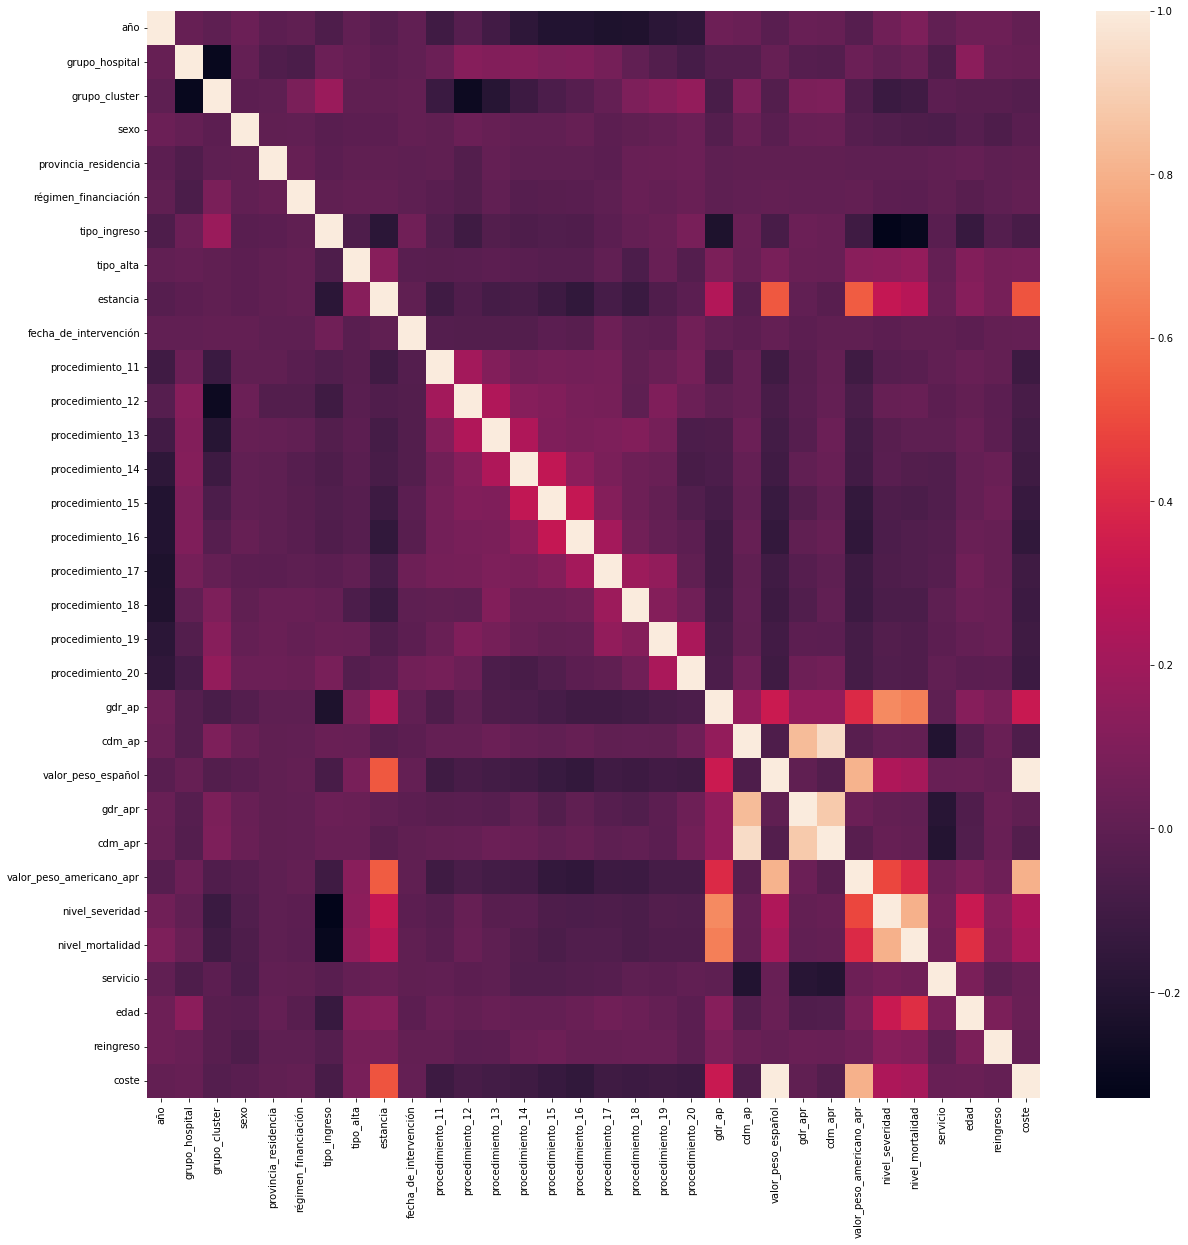

In [29]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [30]:
df.select_dtypes('number').describe()

año  grupo_hospital  grupo_cluster           sexo  \
count  140937.000000   140937.000000  140937.000000  140937.000000   
mean     2011.504729        3.069386       8.712382       1.385640   
std         2.248531        0.963666      20.757274       0.486806   
min      2008.000000        1.000000       1.000000       1.000000   
25%      2010.000000        2.000000       3.000000       1.000000   
50%      2012.000000        3.000000       4.000000       1.000000   
75%      2013.000000        4.000000       5.000000       2.000000   
max      2015.000000        4.000000      99.000000       3.000000   

       provincia_residencia  régimen_financiación   tipo_ingreso  \
count         140937.000000         140937.000000  140937.000000   
mean              28.295345              1.108190       1.229322   
std                5.048316              0.773977       0.505773   
min                1.000000              1.000000       1.000000   
25%               28.000000              1.000000       1.000000   
50%               28.000000              1.000000       1.000000   
75%               28.000000              1.000000       1.000000   
max               99.000000              9.000000       9.000000   

           tipo_alta       estancia  fecha_de_intervención  procedimiento_11  \
count  140937.000000  140937.000000           4.998000e+03      12341.000000   
mean        1.148045       8.233792           1.601155e+07         89.994133   
std         0.709761      10.094767           8.673040e+06         11.674164   
min         1.000000       0.000000           1.012013e+06          0.120000   
25%         1.000000       3.000000           9.022010e+06         89.390000   
50%         1.000000       6.000000           1.608201e+07         90.490000   
75%         1.000000      10.000000           2.311201e+07         93.960000   
max         9.000000     623.000000           3.112201e+07         99.840000   

       procedimiento_12  procedimiento_13  procedimiento_14  procedimiento_15  \
count       7648.000000       4976.000000       7378.000000       6064.000000   
mean          88.978576         89.173368         90.813866         90.658287   
std           13.366136         12.870377          9.212901          9.544991   
min            0.140000          0.120000          0.140000          0.140000   
25%           88.927500         89.370000         89.170000         89.370000   
50%           90.420000         90.460000         90.410000         90.310000   
75%           93.940000         93.940000         93.960000         93.960000   
max           99.990000         99.910000         99.990000         99.840000   

       procedimiento_16  procedimiento_17  procedimiento_18  procedimiento_19  \
count       4901.000000       3990.000000       3357.000000       2780.000000   
mean          90.871745         90.641140         90.146235         90.557446   
std            9.400413          9.454177          9.762235          8.079143   
min            0.140000          0.140000          0.140000          0.140000   
25%           89.520000         89.520000         89.370000         89.370000   
50%           90.490000         90.420000         90.410000         90.410000   
75%           93.960000         93.940000         92.180000         92.140000   
max           99.940000         99.840000         99.840000         99.840000   

       procedimiento_20         gdr_ap         cdm_ap  valor_peso_español  \
count       2123.000000  140937.000000  140937.000000       140937.000000   
mean          91.138337     339.322477       4.462391            0.927574   
std            7.419758     240.095403       2.991342            1.166974   
min            0.140000       1.000000       0.000000            0.000000   
25%           89.520000      88.000000       4.000000            0.634600   
50%           90.590000     539.000000       4.000000            0.830500   
75%           93.940000     541.000000       4.000000

In [31]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [32]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [33]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
7         28
9         28
37        25
29        24
41        24
36        23
14        23
27        21
46        19
15        19
42        19
4         19
49        18
23        18
39        16
34        15
48        13
51        12
31        12
20        11
32        10
26        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [34]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [35]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [36]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

In [8]:
conditionlist = [
    (df['edad'] <= 12) ,
    (df['edad'] > 12) & (df['edad'] <=18),
    (df['edad'] >18) & (df['edad'] <=26),
    (df['edad'] >=27) & (df['edad'] <=59),
    (df['edad']>=60)]
choicelist = ['Niño','Adolescente', 'Joven', 'Adulto','Persona Mayor']
df['grupo_edad'] = np.select(conditionlist, choicelist, default='Not Specified')

<AxesSubplot:title={'center':'estancia'}, xlabel='[grupo_edad]'>

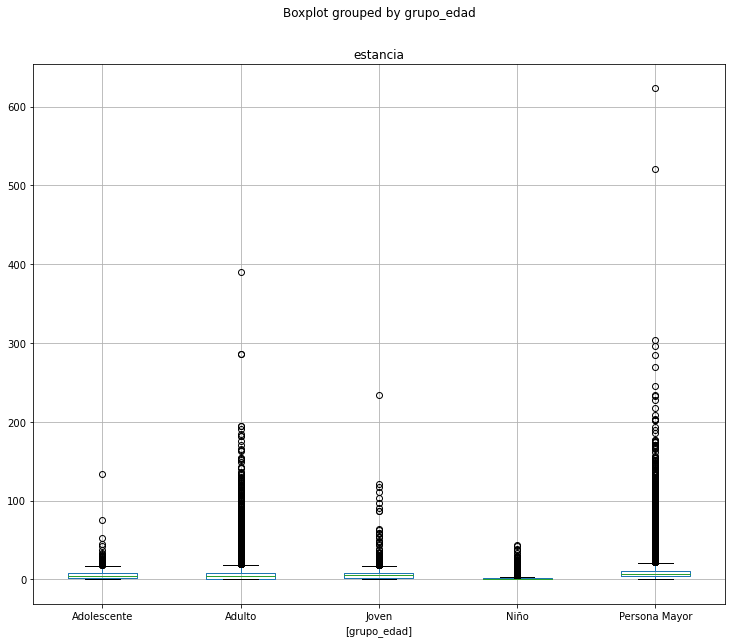

In [9]:
df[['grupo_edad','estancia']].boxplot(by='grupo_edad',figsize=(12,10))


In [39]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
servicio                    0.081427
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
régimen_financiación       -0.024833
s

In [40]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
servicio                    0.027488
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
grupo_cluster              -0.000623
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
procedimiento_13           -0.089891
p

In [41]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
servicio                    0.027178
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
procedimiento_14           -0.108115
p

In [42]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
servicio                    0.027724
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
procedimiento_14           -0.104873
p

In [35]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

In [36]:
df.ingreso_mes_año=pd.to_datetime(df.ingreso_mes_año)

In [45]:
px.line(df.groupby('ingreso_mes_año').count().reset_index().sort_values('ingreso_mes_año'),x='ingreso_mes_año',y='fecha_de_ingreso')

In [10]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','historia_recodificada','cip_recodificado','diagnóstico_principal','diagnóstico_2','procedimiento_1','valor_peso_español','nivel_severidad','nivel_mortalidad',	'servicio','edad','reingreso']

In [47]:
len(features)

16

<AxesSubplot:title={'center':'edad'}, xlabel='[tipo_ingreso]'>

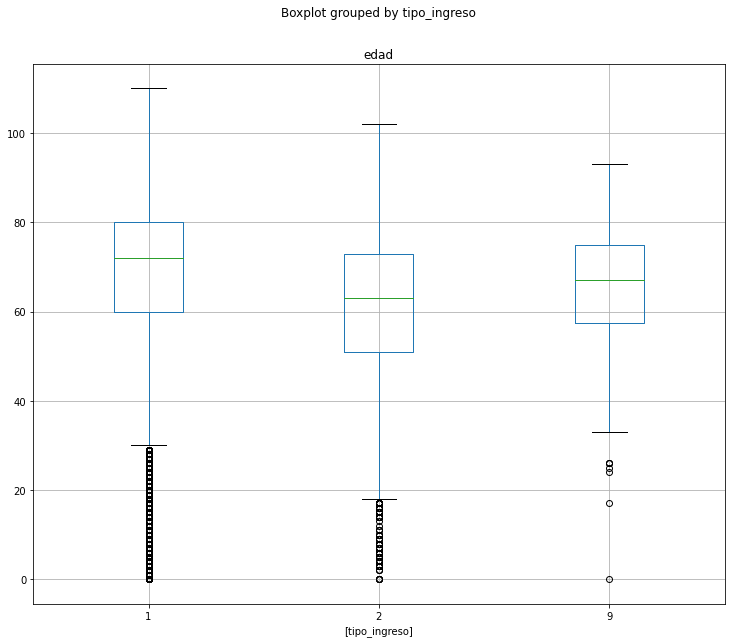

In [441]:
df[['tipo_ingreso','edad']].boxplot(by='tipo_ingreso',figsize=(12,10))

<AxesSubplot:title={'center':'estancia'}, xlabel='[sexo]'>

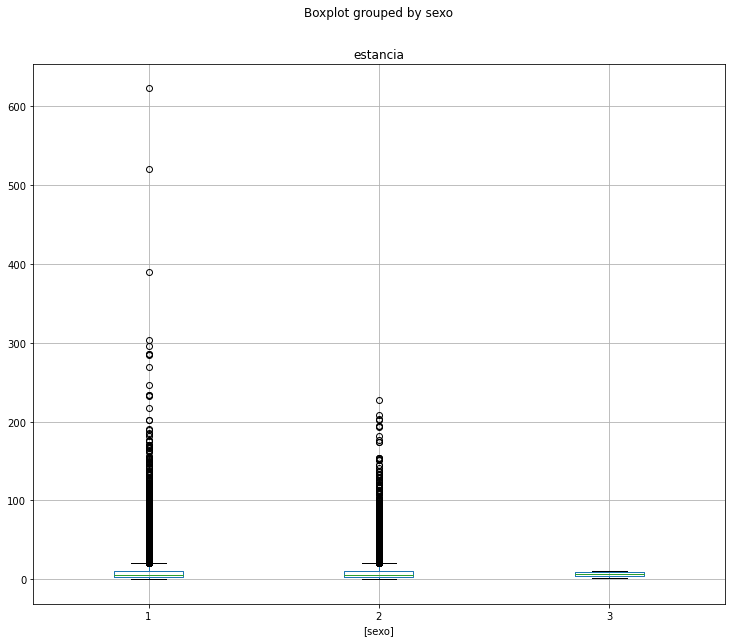

In [443]:
df[['estancia','sexo']].boxplot(by='sexo',figsize=(12,10))

In [12]:
px.bar(df[['nivel_severidad','sexo']].groupby(by='sexo').value_counts().reset_index().set_index(['sexo','nivel_severidad']).reset_index(),x='nivel_severidad',y=0,color='sexo')

In [49]:
df.ingreso_mes_año.value_counts()

2015-01-01    2226
2011-01-01    2134
2012-01-01    2130
2014-01-01    1887
2013-12-01    1879
              ... 
2007-12-01     549
2007-11-01      19
2007-10-01       3
2007-09-01       3
2007-08-01       2
Name: ingreso_mes_año, Length: 101, dtype: int64

In [50]:
df[features].head()

grupo_cluster  sexo fecha_de_ingreso  tipo_ingreso  estancia  \
0              4     1       2013-10-30             1        14   
1              4     1       2013-03-19             1         6   
2              4     1       2013-11-15             1        11   
3              5     2       2013-04-28             1        16   
4              3     1       2013-02-07             2         1   

  historia_recodificada       cip_recodificado diagnóstico_principal  \
0  -1687781257578748014   -320943158-171303395                 428.0   
1    166370745435838543     648485069584850511                491.21   
2    183632305468848809   899288196-1988273609                 428.0   
3   2877111881585847151  -961279109-1723117644                 428.1   
4  17519509571482774643     -33451060035352825                 162.5   

  diagnóstico_2 procedimiento_1  valor_peso_español  nivel_severidad  \
0           NaN           39.96              0.9181                3   
1           NaN           90.42              0.9407                3   
2           NaN           90.42              0.9181                4   
3           NaN           88.72              0.9181                3   
4           NaN           33.26              0.9844                2   

   nivel_mortalidad  servicio  edad  reingreso  
0                 2         1    69          1  
1                 3         1    75          0  
2                 4         1    90          0  
3                 4         1    56          0  
4                 2         1    84          0

In [51]:
df=df[features]

<AxesSubplot:>

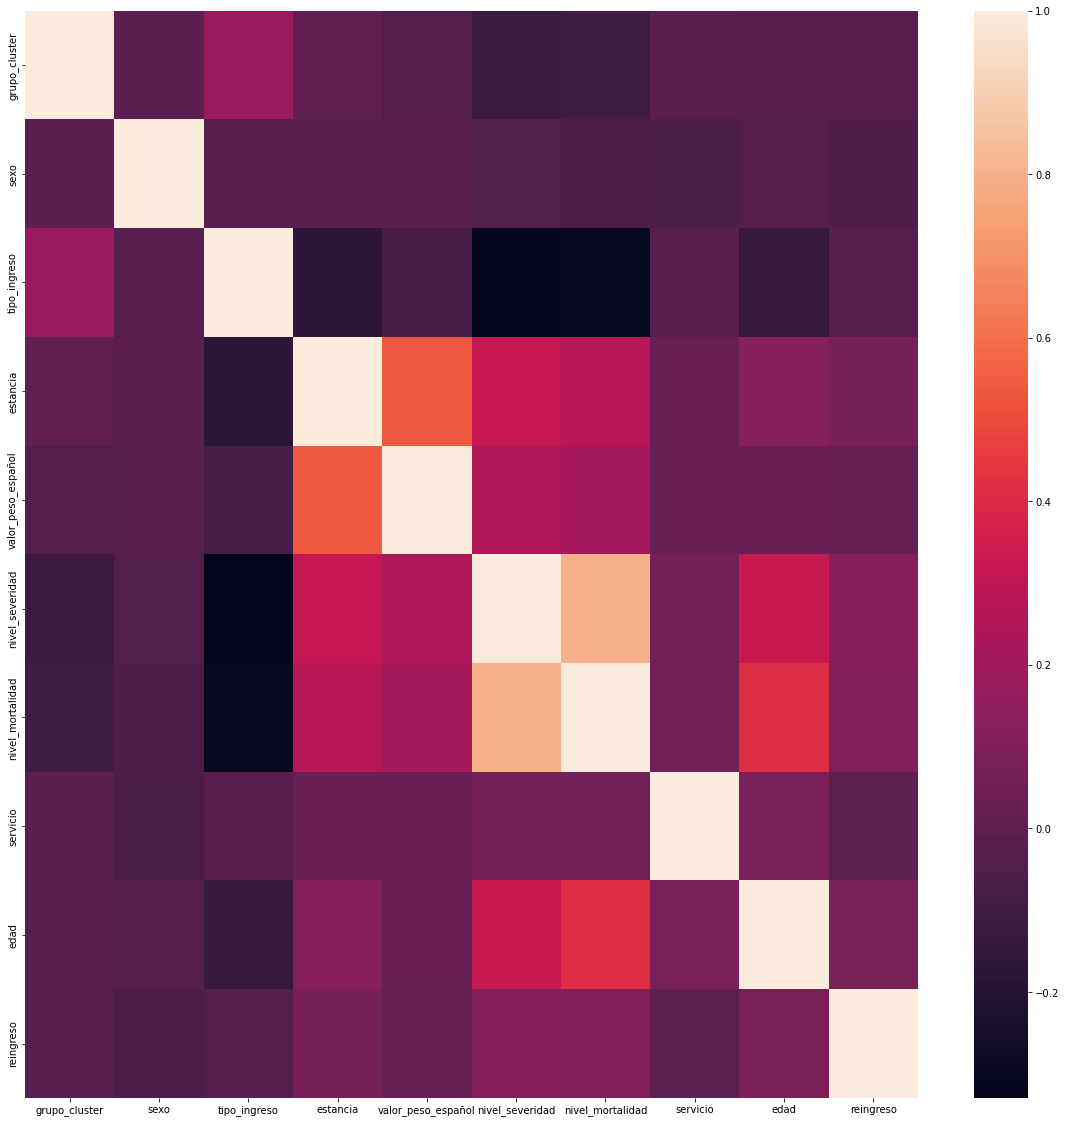

In [52]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

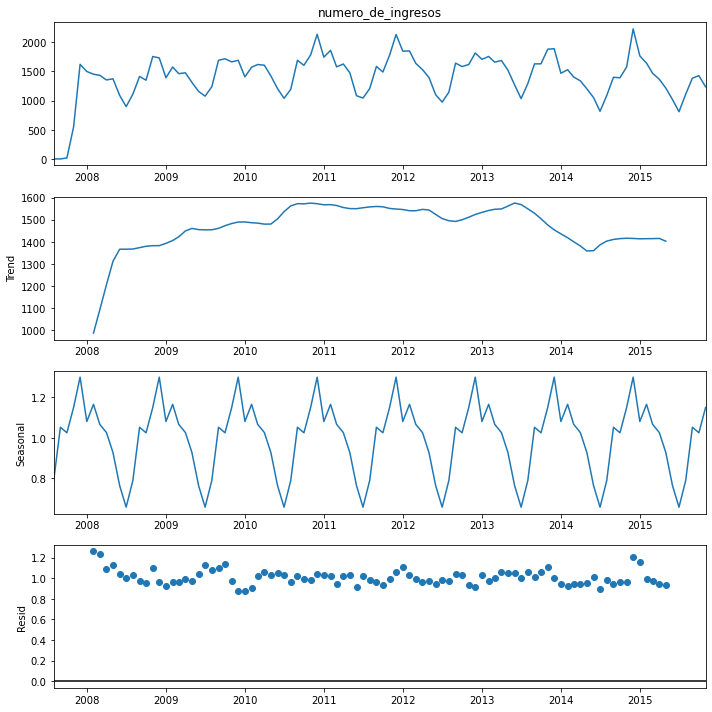

In [456]:

df_serie_temporal = df_def.loc[:,['fecha','numero_de_ingresos']]
df_serie_temporal['fecha'] = pd.to_datetime(df_serie_temporal['fecha'])
df_serie_temporal.set_index(keys='fecha',inplace=True)
df_serie_temporal.dropna(inplace=True)

estacionalidad = seasonal_decompose(
    df_serie_temporal['numero_de_ingresos'],
    model='multiplicative',
    period=12
)

fig = estacionalidad.plot()
fig.set_size_inches(10,10)
fig.tight_layout()
plt.show()

In [59]:
Ds = df_calidad_aire.columns[[x.startswith('D') for x in df_calidad_aire.columns]]

In [60]:
df_d = df_calidad_aire[Ds]

In [61]:
df_d.fillna(0,inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/1522000805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_calidad_aire['value'] = df_d.mean(axis=1)

In [63]:
df_calidad_aire = df_calidad_aire[['PUNTO_MUESTREO','MAGNITUD','ANO','MES','value']]

In [64]:
df_calidad_aire['fecha'] = df_calidad_aire['ANO'].astype(str) + '-' + df_calidad_aire['MES'].astype(str)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2462284980.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
df_calidad_aire['fecha'] = pd.to_datetime(df_calidad_aire['fecha'])

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/1430271777.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df_magnitud = df_calidad_aire.groupby(['MAGNITUD','fecha']).mean().reset_index()

In [62]:
px.line(df_magnitud,x='fecha',y='value',color='MAGNITUD')

In [68]:
magnitud_nombre={1:'Dióxido de Azufre',6:'Monóxido de Carbono',
  7:'Monóxido de Nitrógeno',  8:'Dióxido de Nitrógeno', 
   9:'Partículas menor 2.5 μm', 10:'Partículas menor 10 μm', 
   12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 
   30:'Benceno', 35:'Etilbenceno', 42:'Hidrocarburos totales (hexano)', 
   43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

In [69]:
def set_values(row, value):
    return value[row]

In [70]:
df_magnitud['MAGNITUD_NOMBRE']=df_magnitud.MAGNITUD.apply(set_values,args=(magnitud_nombre,))

In [66]:
px.line(df_magnitud.reset_index(),x='fecha',y='value',color='MAGNITUD_NOMBRE')

In [55]:
df_umbrales = pd.read_excel('data/Umbrales.xlsx')

In [71]:
df_fin = df_magnitud.merge(df_umbrales, left_on='MAGNITUD',right_on='CODIGO', how='inner')

In [72]:
particulas=['Dióxido de Azufre','Monóxido de Carbono','Dióxido de Nitrógeno','Partículas menor 2,5 μm','Partículas menor 10 μm','Óxidos de Nitrógeno','Ozono','Benceno']

In [73]:
df_fin.drop(['CODIGO','MAGNITUD_y'],axis=1,inplace=True)

In [74]:
df_fin.columns = ['CODIGO','fecha','ANO','MES', 'value', 'PARTICULA', 'ABREVIATURA','MEDIDA','LIMITE', 'COMENTARIO']

In [75]:
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = np.nan
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8)].value.mean()

In [73]:
df_fin.sample(20)

CODIGO      fecha     ANO   MES       value                PARTICULA  \
100       1 2015-05-01  2015.0   5.0    5.206452        Dióxido de Azufre   
905      30 2010-06-01  2010.0   6.0    0.506452                  Benceno   
804      14 2011-01-01  2011.0   1.0   21.313364                    Ozono   
543      10 2011-08-01  2011.0   8.0   23.384409   Partículas menor 10 μm   
471      10 2008-08-01  2008.0   8.0   29.096774   Partículas menor 10 μm   
575      10 2012-12-01  2012.0  12.0   15.763441   Partículas menor 10 μm   
788      14 2009-09-01  2009.0   9.0   60.294931                    Ozono   
317       8 2015-06-01  2015.0   6.0   29.750000     Dióxido de Nitrógeno   
421       9 2015-02-01  2015.0   2.0    7.096774  Partículas menor 2.5 μm   
800      14 2010-09-01  2010.0   9.0   44.300248                    Ozono   
437      10 2007-03-01  2007.0   3.0   24.817204   Partículas menor 10 μm   
216       8 2007-01-01  2007.0   1.0   56.478006     Dióxido de Nitrógeno   
683      12 2009-12-01  2009.0  12.0  106.064516      Óxidos de Nitrógeno   
488      10 2009-05-01  2009.0   5.0   24.188172   Partículas menor 10 μm   
896      30 2009-09-01  2009.0   9.0    0.338710                  Benceno   
785      14 2009-06-01  2009.0   6.0   56.778802                    Ozono   
54        1 2011-07-01  2011.0   7.0    5.590323        Dióxido de Azufre   
297       8 2013-10-01  2013.0  10.0   41.401882     Dióxido de Nitrógeno   
56        1 2011-09-01  2011.0   9.0    5.003226        Dióxido de Azufre   
851      14 2014-12-01  2014.0  12.0   21.509217                    Ozono   

    ABREVIATURA  MEDIDA  LIMITE  \
100         SO3  μg/m 4     500   
905         BEN  μg/m 3       5   
804         O3   μg/m 3     120   
543        PM10  μg/m 3      50   
471        PM10  μg/m 3      50   
575        PM10  μg/m 3      50   
788         O3   μg/m 3     120   
317         NO3  μg/m 4     400   
421       PM2.5  μg/m 3      25   
800         O3   μg/m 3     120   
437        PM10  μg/m 3      50   
216         NO3  μg/m 4     400   
683        NOx   μg/m 3      30   
488        PM10  μg/m 3      40   
896         BEN  μg/m 3       5   
785         O3   μg/m 3     120   
54          SO3  μg/m 4     500   
297         NO3  μg/m 4     400   
56          SO3  μg/m 4     500   
851         O3   μg/m 3     120   

                                            COMENTARIO  
100  Alerta. Media horaria durante 3 horas consecut...  
905                                        Media anual  
804  Máxima diaria de las medias móviles octohorari...  
543  Media diaria. No podrá superarse en más de 35 ...  
471  Media diaria. No podrá superarse en más de 35 ...  
575  Media diaria. No podrá superarse en más de 35 ...  
788  Máxima diaria de las medias móviles octohorari...  
317  Alerta. Media horaria, durante 3 horas consecu...  
421                                        Media anual  
800  Máxima diaria de las medias móviles octohorari...  
437  Media diaria. No podrá superarse en más de 35 ...  
216  Alerta. Media horaria, durante 3 horas consecu...  
683                             Afecta a la vegetación  
488                           Límite en la media anual  
896                                        Media anual  
785  Máxima diaria de las medias móviles octohorari...  
54   Alerta. Media horaria durante 3 horas consecut...  
297  Alerta. Media horaria, durante 3 horas consecu...  
56   Alerta. Media horaria durante 3 horas consecut...  
851  Máxima diaria de las medias móviles octohorari...

In [32]:
df['año_ingreso']=df.fecha_de_ingreso.dt.year
df['mes_ingreso']=df.fecha_de_ingreso.dt.month
df['dia_ingreso']=df.fecha_de_ingreso.dt.day
df['admission_date'] = df.fecha_de_ingreso

In [79]:
df_temperatura=df_temperatura[['fecha','tm_mes','hr','p_max','p_mes']]

In [80]:
df_temperatura.p_max=df_temperatura.p_max.str.slice(0,3).astype('float')

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/839555511.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
df_temperatura.fecha=pd.to_datetime(df_temperatura.fecha)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/1380418688.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df_temperatura.tm_mes.interpolate(method="akima",inplace=True)
df_temperatura.hr.interpolate(method="akima",inplace=True)
df_temperatura.p_max.interpolate(method="akima",inplace=True)
df_temperatura.p_mes.interpolate(method="akima",inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2695946924.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2695946924.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2695946924.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2695946924.py:4: SettingWithCopyWarning:


A value is 

In [146]:
px.line(df_temperatura,x='fecha',y=['p_max','hr','p_mes','tm_mes'])

In [83]:
df_temperatura.rename(columns={'tm_mes':'temperatura_media_mes','hr':'humedad_relativa','p_max':'precipitaciones','p_mes':'presion_atmosferica_mes'},inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2670310183.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Diagnósticos

In [13]:
enfermedad_pulmonar_obstructiva_cronica = [
    '491.0', '491.1', '491.20', '491.21', '491.22', '491.8', '491.9', '492.0', '492.8', '494', '494.0', '494.1', '496'
]

bronquitis_aguda = [
    '466.0','490'
]

asma = [
    '493.00', '493.01', '493.02', '493.10', '493.11', '493.12', '493.20', '493.21', '493.22', '493.81', '493.82', '493.90', '493.91', '493.92'
]

fibrosis_quistica_o_anomalias_sistema_respiratorio = [
    '277.00', '277.01', '277.02','277.03', '277.09', '516.61','516.62', '516.63', '516.64', '516.69', '747.21', '748.3', '748.4', '748.5', '748.60', '748.61', '748.69', '748.8', '748.9', '750.3', '759.3','770.7'
]

insuficiencia_cardiaca_congestiva = [
    '398.91', '402.01', '402.11', '402.91', '404.01', '404.03', '404.11', '404.13', '404.91', '404.93', '428.0', '428.1', '428.20', '428.21', '428.22', '428.23', '428.30', '428.31', '428.32', '428.33', '428.40', '428.41', '428.42', '428.43', '428.9'
]

hipertension_arterial = [
    '401.0', '401.9', '402.00', '402.10', '402.90', '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]


neumonia_bacteriana = [
    '481', '482.2', '482.30', '482,31', '482.32', '482.39', '482.41', '482.42', '482.9', '483.0', '483.1', '483.8', '485', '486'
]

anemia_falciforme_o_enfermedad_hemoglobina_S = [
    '282.41', '282.42', '282.60', '282.61', '282.62', '282.63', '282.64', '282.68', '282.69'
]

diabetes_incontrolada_sin_complicacion = [
    '250.02','250.03'
]

diabetes_con_complicacion_aguda = [
    '250.10', '250,11', '250.12', '250.13', '250.20', '250.21','250.22','250.23', '250.30', '250.31', '250.32', '250.33'
]

diabetes_con_complicacion_cronica = [
    '250.40', '250.41', '250.42', '250.43', '250.50', '250.51', '250.52', '250.53', '250.60', '250.61', '250.62', '250.63', '250.70', '250.71', '250.72', '250.73', '250.80','250.81', '250.82', '250.83', '250.90', '250.91', '250.92', '250.93'
]

infarto_agudo_de_miocardio = [
    '410.01','410.11','410.21','410.31','410.41','410.51','410.71','410.81','410.90','410.91'
]

## Procedimientos

In [14]:
dialisis = [
    '38.95', '39.27', '39.29', '39.42', '39.43', '39.93', '39.94'
]

## Enfermedades

In [17]:
pqi_01_complicaciones_a_corto_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    (df['edad'] >= 15)
)

pqi_03_complicaciones_a_largo_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_cronica))
    &
    (df['edad'] >= 15)
)

pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores = (
    (
    (df['diagnóstico_principal'].isin(enfermedad_pulmonar_obstructiva_cronica)) |
    ((df['diagnóstico_principal'].isin(bronquitis_aguda)) & (df['diagnóstico_2'].isin(enfermedad_pulmonar_obstructiva_cronica))) |
    (df['diagnóstico_principal'].isin(asma))
    ) 
    & 
    (df['edad'] >= 40) 
    &
    ~(df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
)

pqi_07_hipertension_arterial = (
    (df['diagnóstico_principal'].isin(hipertension_arterial))
    &
    (df['edad'] >= 15)
    & 
    (df['procedimiento_1'].isin(dialisis)) 
)

pqi_08_insuficiencia_cardiaca_congestiva  = (
    (df['diagnóstico_principal'].isin(insuficiencia_cardiaca_congestiva))
    &
    (df['edad'] >= 15) 
)

pqi_11_neumonia_bacteriana = (
    (df['diagnóstico_principal'].isin(neumonia_bacteriana))
    &
    (df['edad'] >= 15)
    & 
    ~(df['diagnóstico_2'].isin(anemia_falciforme_o_enfermedad_hemoglobina_S))
)

pqi_14_diabetes_incontrolada_sin_complicacion = (
    (df['diagnóstico_principal'].isin(diabetes_incontrolada_sin_complicacion))
    &
    (df['edad'] >= 15)
)

pqi_15_asma_en_adultos_jovenes_15_39_anos = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 18) & (df['edad'] < 39))
    & 
    ~ (
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

hospitalizacion_por_infarto_agudo_de_miocardio = (
    df['diagnóstico_principal'].isin(infarto_agudo_de_miocardio)
)

## Condiciones crónicas

In [18]:
complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    ((df['edad'] >= 6) & (df['edad'] < 15))
)

hospitalizacion_por_asma_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 2) & (df['edad'] < 15))
    & 
    ~(
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

In [19]:
diagnosis_dict = {
    'enfermedad pulmonar obstructiva cronica': enfermedad_pulmonar_obstructiva_cronica,
    'bronquitis aguda': bronquitis_aguda,
    'asma': asma,
    'fibrosis quistica o anomalias sistema respiratorio': fibrosis_quistica_o_anomalias_sistema_respiratorio,
    'insuficiencia cardiaca congestiva': insuficiencia_cardiaca_congestiva,
    'hipertension arterial': hipertension_arterial,
    'neumonia bacteriana': neumonia_bacteriana,
    'anemia falciforme o enfermedad hemoglobina S': anemia_falciforme_o_enfermedad_hemoglobina_S,
    'diabetes incontrolada sin complicacion': diabetes_incontrolada_sin_complicacion,
    'diabetes con complicacion aguda': diabetes_con_complicacion_aguda,
    'diabetes con complicacion cronica': diabetes_con_complicacion_cronica,
    'infarto agudo de miocardio': infarto_agudo_de_miocardio
}

for diagnosis, diagnosis_codes in diagnosis_dict.items():
    df.loc[
        df['diagnóstico_principal'].isin(diagnosis_codes),
        'diagnosis_name'
    ] = f'{diagnosis}'

df[['diagnóstico_principal','diagnosis_name']].head()

diagnóstico_principal                           diagnosis_name
0                 428.0        insuficiencia cardiaca congestiva
1                491.21  enfermedad pulmonar obstructiva cronica
2                 428.0        insuficiencia cardiaca congestiva
3                 428.1        insuficiencia cardiaca congestiva
4                 162.5                                      NaN

In [20]:
diagnosticos=list(diagnosis_dict.keys())
diagnosticos.append('fecha')
del diagnosticos[8]

In [21]:
diseases_filters_dict = {
    'PQI 01 complicaciones a corto plazo de la diabetes': pqi_01_complicaciones_a_corto_plazo_de_la_diabetes,
    'PQI 03 complicaciones a largo plazo de la diabetes': pqi_03_complicaciones_a_largo_plazo_de_la_diabetes,
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores': pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores,
    'PQI 07 hipertension arterial': pqi_07_hipertension_arterial,
    'PQI 08 insuficiencia cardiaca congestiva': pqi_08_insuficiencia_cardiaca_congestiva,
    'PQI 11 neumonia bacteriana': pqi_11_neumonia_bacteriana,
    'PQI 14 diabetes incontrolada sin complicacion': pqi_14_diabetes_incontrolada_sin_complicacion,
    'PQI 15 asma en adultos jovenes 15 39 anos': pqi_15_asma_en_adultos_jovenes_15_39_anos,
    'hospitalizacion por infarto agudo de miocardio': hospitalizacion_por_infarto_agudo_de_miocardio,
    'complicaciones a corto plazo de la diabetes en poblacion infantil': complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil,
    'hospitalizacion por asma en poblacion infantil': hospitalizacion_por_asma_en_poblacion_infantil
}

for disease, disease_filter in diseases_filters_dict.items():
    df.loc[disease_filter, 'disease_name'] = f'{disease}'

In [41]:
campos_de_agrupacion = ['admission_date','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [40]:
campos_de_agrupacion = ['ingreso_mes_año','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'ingreso_mes_año',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [34]:
campos_de_agrupacion = ['admission_date','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [42]:
campos_de_agrupacion = ['ingreso_mes_año','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'ingreso_mes_año',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [88]:
df=df.sort_values('fecha_de_ingreso')
df.head()

grupo_cluster  sexo fecha_de_ingreso  tipo_ingreso  estancia  \
16583              6     1       2007-08-02             2       166   
12521              5     2       2007-08-20             2       193   
28366              4     1       2007-09-20             1       112   
47906              5     1       2007-09-20             1       127   
60137              3     2       2007-09-29             1       109   

        historia_recodificada cip_recodificado diagnóstico_principal  \
16583   -529045945-1318899342               00                011.93   
12521  -1710416977-1689576786               00                 150.5   
28366      679077701190970178               00                 394.0   
47906    15168214271531108233               00                 860.0   
60137    1698874227-411547317               00                518.81   

      diagnóstico_2 procedimiento_1  valor_peso_español  nivel_severidad  \
16583         292.9           87.44               2.015                2   
12521         038.9            31.1              16.498                4   
28366        041.19            31.1              16.498                4   
47906         038.9           00.17              16.498                4   
60137         246.8            31.1              11.517                3   

       nivel_mortalidad  servicio  edad  reingreso  año_ingreso  mes_ingreso  \
16583                 1         1    37          0         2007            8   
12521                 4         1    73          0         2007            8   
28366                 4         1    76          0         2007            9   
47906                 4         1    79          0         2007            9   
60137                 4         1    73          0         2007            9   

       dia_ingreso admission_date diagnosis_name disease_name  
16583            2     2007-08-02            NaN          NaN  
12521           20     2007-08-20            NaN          NaN  
28366           20     2007-09-20            NaN          NaN  
47906           20     2007-09-20            NaN          NaN  
60137           29     2007-09-29            NaN          NaN

In [89]:
df_num_ingresos_diagnostico=df.groupby(['año_ingreso','mes_ingreso','diagnosis_name'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [48]:
df_num_ingresos=df.groupby(['año_ingreso','mes_ingreso'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [49]:
df_num_ingresos['fecha']=df_num_ingresos.año_ingreso.astype('str')+'-'+df_num_ingresos.mes_ingreso.astype('str')

In [50]:
df_num_ingresos.fecha=pd.to_datetime(df_num_ingresos.fecha,format='%Y-%m')

In [51]:
df_num_ingresos=df_num_ingresos[['fecha','numero_de_ingresos']]

In [52]:
df_num_ingresos.numero_de_ingresos=df_num_ingresos.numero_de_ingresos.shift(-1)

In [53]:
df_num_ingresos.dropna(inplace=True)

In [54]:
df_num_ingresos

fecha  numero_de_ingresos
0  2007-08-01                 3.0
1  2007-09-01                 3.0
2  2007-10-01                19.0
3  2007-11-01               549.0
4  2007-12-01              1620.0
..        ...                 ...
95 2015-07-01               810.0
96 2015-08-01              1109.0
97 2015-09-01              1384.0
98 2015-10-01              1427.0
99 2015-11-01              1235.0

[100 rows x 2 columns]

In [97]:
df_num_ingresos_diagnostico['mes_ano']=df_num_ingresos_diagnostico.año_ingreso.astype('str')+'-'+df_num_ingresos_diagnostico.mes_ingreso.astype('str')

In [98]:
df_num_ingresos_diagnostico.mes_ano=pd.to_datetime(df_num_ingresos_diagnostico.mes_ano,format='%Y-%m')

In [99]:
df_num_ingresos_diagnostico_pivot=df_num_ingresos_diagnostico.pivot('mes_ano','diagnosis_name','numero_de_ingresos').reset_index()

In [100]:
df_magnitud.ANO=df_magnitud.ANO.astype('int')
df_magnitud.MES=df_magnitud.MES.astype('int')

In [76]:
df_merge=df_num_ingresos.merge(df_fin,on=['fecha'],how='inner')

In [216]:
df_merge.sample(20)

fecha  numero_de_ingresos  CODIGO     ANO   MES      value  \
188 2009-04-01              1475.0      30  2009.0   4.0   0.370968   
23  2007-10-01                19.0      10  2007.0  10.0  26.752688   
799 2014-12-01              2226.0      14  2014.0  12.0  21.509217   
90  2008-06-01              1089.0       1  2008.0   6.0   6.854839   
434 2011-08-01              1205.0       8  2011.0   8.0  33.827957   
884 2015-10-01              1427.0       8  2015.0  10.0  42.154570   
335 2010-09-01              1690.0       8  2010.0   9.0  46.471248   
464 2011-11-01              1778.0      10  2011.0  11.0  19.225806   
264 2010-01-01              1406.0       9  2010.0   1.0  10.096774   
86  2008-05-01              1373.0      10  2008.0   5.0  21.553763   
698 2014-01-01              1468.0      10  2014.0   1.0  13.048387   
624 2013-05-01              1520.0       9  2013.0   5.0   7.940860   
492 2012-02-01              1848.0      12  2012.0   2.0  93.821237   
889 2015-10-01              1427.0      14  2015.0  10.0  32.099078   
752 2014-07-01               817.0      10  2014.0   7.0  21.346774   
656 2013-08-01              1291.0      30  2013.0   8.0   0.467742   
175 2009-03-01              1461.0      10  2009.0   3.0  24.432258   
881 2015-09-01              1384.0      30  2015.0   9.0   0.498925   
204 2009-06-01              1157.0      12  2009.0   6.0  54.699752   
209 2009-07-01              1076.0       8  2009.0   7.0  39.215881   

                   PARTICULA ABREVIATURA  MEDIDA  LIMITE  \
188                  Benceno         BEN  μg/m 3       5   
23    Partículas menor 10 μm        PM10  μg/m 3      50   
799                    Ozono         O3   μg/m 3     120   
90         Dióxido de Azufre         SO3  μg/m 4     500   
434     Dióxido de Nitrógeno         NO3  μg/m 4     400   
884     Dióxido de Nitrógeno         NO3  μg/m 4     400   
335     Dióxido de Nitrógeno         NO3  μg/m 4     400   
464   Partículas menor 10 μm        PM10  μg/m 3      50   
264  Partículas menor 2.5 μm       PM2.5  μg/m 3      25   
86    Partículas menor 10 μm        PM10  μg/m 3      50   
698   Partículas menor 10 μm        PM10  μg/m 3      50   
624  Partículas menor 2.5 μm       PM2.5  μg/m 3      25   
492      Óxidos de Nitrógeno        NOx   μg/m 3      30   
889                    Ozono         O3   μg/m 3     120   
752   Partículas menor 10 μm        PM10  μg/m 3      50   
656                  Benceno         BEN  μg/m 3       5   
175   Partículas menor 10 μm        PM10  μg/m 3      40   
881                  Benceno         BEN  μg/m 3       5   
204      Óxidos de Nitrógeno        NOx   μg/m 3      30   
209     Dióxido de Nitrógeno         NO3  μg/m 4     400   

                                            COMENTARIO  
188                                        Media anual  
23   Media diaria. No podrá superarse en más de 35 ...  
799  Máxima diaria de las medias móviles octohorari...  
90   Alerta. Media horaria durante 3 horas consecut...  
434  Alerta. Media horaria, durante 3 horas consecu...  
884  Alerta. Media horaria, durante 3 horas consecu...  
335  Alerta. Media horaria, durante 3 horas consecu...  
464  Media diaria. No podrá superarse en más de 35 ...  
264                                        Media anual  
86   Media diaria. No podrá superarse en más de 35 ...  
698  Media diaria. No podrá superarse en más de 35 ...  
624                                        Media anual  
492                             Afecta a la vegetación  
889  Máxima diaria de las medias móviles octohorari...  
752  Media diaria. No podrá superarse en más de 35 ...  
656                                        Media anual  
175                           Límite en la media anual  
881                                        Media anual  
204                             Afecta a la vegetación  
209  Alerta. Media horaria, durante 3 horas consecu...

In [103]:
px.line(df_merge,x='fecha',y=['value','LIMITE'],color='PARTICULA')

In [77]:
df_merge.drop(['COMENTARIO','ABREVIATURA','MEDIDA','ANO','MES'],axis=1,inplace=True)

In [218]:
df_merge.head(10)

fecha  numero_de_ingresos  CODIGO      value                PARTICULA  \
0 2007-08-01                 3.0       1   6.366935        Dióxido de Azufre   
1 2007-08-01                 3.0       6   0.234677      Monóxido de Carbono   
2 2007-08-01                 3.0       8  30.892473     Dióxido de Nitrógeno   
3 2007-08-01                 3.0       9  14.887097  Partículas menor 2.5 μm   
4 2007-08-01                 3.0      10  34.865591   Partículas menor 10 μm   
5 2007-08-01                 3.0      10  34.865591   Partículas menor 10 μm   
6 2007-08-01                 3.0      12  46.169355      Óxidos de Nitrógeno   
7 2007-08-01                 3.0      14  59.720430                    Ozono   
8 2007-08-01                 3.0      30   0.375806                  Benceno   
9 2007-09-01                 3.0       1   5.955645        Dióxido de Azufre   

   LIMITE  
0     500  
1      10  
2     400  
3      25  
4      40  
5      50  
6      30  
7     120  
8       5  
9     500

In [84]:
df_def=pd.pivot_table(df_merge,index='fecha',columns='PARTICULA',values='value').reset_index().merge(df_num_ingresos,on='fecha',how='left').merge(df_temperatura,on='fecha',how='left')

In [168]:
df_def[diagnosticos[:-1]]=df_def[diagnosticos[:-1]].shift(-1)

In [87]:
df_def['Benceno_1_mes']=df_def.Benceno.shift()
df_def['Benceno_2_meses']=df_def.Benceno.shift(2)
df_def['Benceno_3_meses']=df_def.Benceno.shift(3)
df_def['DióxidodDeAzufre_1_mes']=df_def['Dióxido de Azufre'].shift()
df_def['DióxidodDeAzufre_2_meses']=df_def['Dióxido de Azufre'].shift(2)
df_def['DióxidodDeAzufre_3_meses']=df_def['Dióxido de Azufre'].shift(3)
df_def['Ozono_1_mes']=df_def.Ozono.shift()
df_def['Ozono_2_meses']=df_def.Ozono.shift(2)
df_def['Ozono_3_meses']=df_def.Ozono.shift(3)
df_def['DióxidodDeNitrogeno_1_mes']=df_def['Dióxido de Nitrógeno'].shift()
df_def['DióxidodDeNitrogeno_2_meses']=df_def['Dióxido de Nitrógeno'].shift(2)
df_def['DióxidodDeNitrogeno_3_meses']=df_def['Dióxido de Nitrógeno'].shift(3)
df_def['MonoxidoDeCarbono_1_mes']=df_def['Monóxido de Carbono'].shift()
df_def['MonoxidoDeCarbono_2_meses']=df_def['Monóxido de Carbono'].shift(2)
df_def['MonoxidoDeCarbono_3_meses']=df_def['Monóxido de Carbono'].shift(3)
df_def['OxidosDeNitrogeno_1_mes']=df_def['Óxidos de Nitrógeno'].shift()
df_def['OxidosDeNitrogeno_2_meses']=df_def['Óxidos de Nitrógeno'].shift(2)
df_def['OxidosDeNitrogeno_3_meses']=df_def['Óxidos de Nitrógeno'].shift(3)
df_def['Particulas10_1_mes']=df_def['Partículas menor 10 μm'].shift()
df_def['Particulas10_2_meses']=df_def['Partículas menor 10 μm'].shift(2)
df_def['Particulas10_3_meses']=df_def['Partículas menor 10 μm'].shift(3)
df_def['Particulas2.5_1_mes']=df_def['Partículas menor 2.5 μm'].shift()
df_def['Particulas2.5_2_meses']=df_def['Partículas menor 2.5 μm'].shift(2)
df_def['Particulas2.5_3_meses']=df_def['Partículas menor 2.5 μm'].shift(3)
df_def['ingresos_año_anterior']=df_def.numero_de_ingresos.shift(12)
df_def['mes']=df_def.fecha.dt.month

In [347]:
df_def=pd.read_csv('data/df_definitivo.csv',parse_dates=['fecha'])
df_def_diagnosticos=pd.read_csv('data/df_definitivo_por_diagnosticos.csv',parse_dates=['fecha'])

## Modelos por número de ingresos totales

## XGBoost

In [537]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','ingresos_año_anterior','mes']
columns_y='numero_de_ingresos'
limite='2014-12-01'

X_train=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha<=limite)][columns_X]
y_train=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha<=limite)][columns_y]
X_test=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha>limite)][columns_X]
y_test=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha>limite)][columns_y]

In [538]:
df_num_ingresos=df_def[['fecha','numero_de_ingresos']]

In [539]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [540]:
model1=XGBRegressor()

In [541]:
cv = RandomizedSearchCV(model1, param_grid, cv = 5, verbose = True, n_jobs = -1)

In [542]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [543]:
cv.best_score_,cv.best_params_

(0.4411030153866993,
 {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1})

In [544]:
final_model_xgb = XGBRegressor(**cv.best_params_)
final_model_xgb.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

[0]	validation_0-rmse:1333.34228	validation_1-rmse:1192.75537
[1]	validation_0-rmse:1205.36060	validation_1-rmse:1072.41077
[2]	validation_0-rmse:1090.22180	validation_1-rmse:964.16486
[3]	validation_0-rmse:986.86597	validation_1-rmse:858.26349
[4]	validation_0-rmse:893.59906	validation_1-rmse:772.15698
[5]	validation_0-rmse:809.71582	validation_1-rmse:693.06946
[6]	validation_0-rmse:734.11023	validation_1-rmse:620.89386
[7]	validation_0-rmse:666.07233	validation_1-rmse:554.15210
[8]	validation_0-rmse:604.98334	validation_1-rmse:495.19873
[9]	validation_0-rmse:549.82520	validation_1-rmse:449.96906
[10]	validation_0-rmse:499.98102	validation_1-rmse:402.01123
[11]	validation_0-rmse:455.08652	validation_1-rmse:357.23962
[12]	validation_0-rmse:414.39603	validation_1-rmse:323.25522
[13]	validation_0-rmse:377.70947	validation_1-rmse:296.75012
[14]	validation_0-rmse:344.37448	validation_1-rmse:274.52173
[15]	validation_0-rmse:314.45645	validation_1-rmse:252.59393
[16]	validation_0-rmse:286.94

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

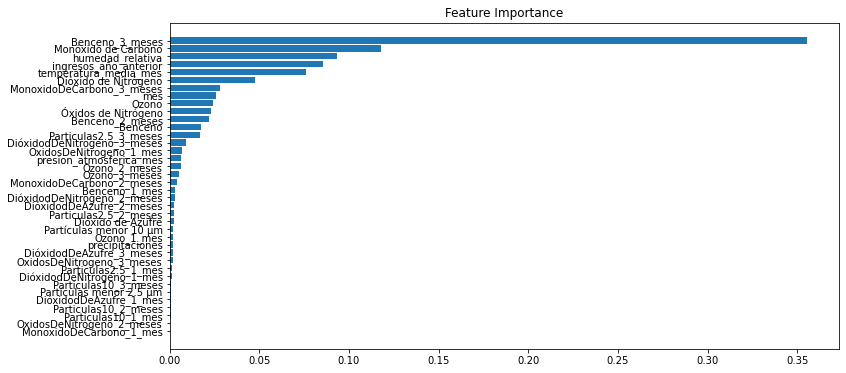

In [545]:
feature_importance = final_model_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [546]:
preds0=final_model_xgb.predict(X_train)
preds1=final_model_xgb.predict(X_test)

In [547]:
rmse_xgb_train,mae_xgb_train,mape_xgb_train=np.sqrt(mean_squared_error(preds0,y_train)),mean_absolute_error(preds0,y_train),mean_absolute_percentage_error(preds0,y_train)
rmse_xgb_test, mae_xgb_test,mape_xgb_test=np.sqrt(mean_squared_error(preds1,y_test)),mean_absolute_error(preds1,y_test),mean_absolute_percentage_error(preds1,y_test)

In [548]:
errores_xgb_train=[ mae_xgb_train,mape_xgb_train,rmse_xgb_train]
errores_xgb_test=[ mae_xgb_test,mape_xgb_test,rmse_xgb_test]

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



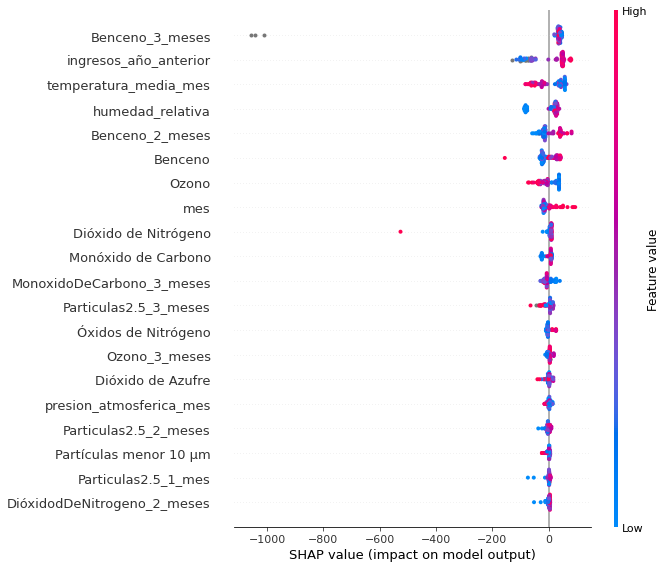

In [549]:
explainer = shap.TreeExplainer(final_model_xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [550]:
df_num_ingresos['predicciones_xgb']=final_model_xgb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/1948407400.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost

In [551]:
model2=CatBoostRegressor()

In [552]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [553]:
cv = RandomizedSearchCV(model2, param_grid, cv = 5, verbose = True, n_jobs = -1)

In [554]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.288043    0.17528963  0.35938152  0.36715694  0.46326699 -0.18763945
 -0.16626711         nan  0.36715694 -0.11721544]



0:	learn: 381.5789252	total: 8.59ms	remaining: 850ms
1:	learn: 368.4485663	total: 13.6ms	remaining: 667ms
2:	learn: 353.8363326	total: 21.1ms	remaining: 684ms
3:	learn: 340.5426164	total: 24.6ms	remaining: 592ms
4:	learn: 328.3866455	total: 27.9ms	remaining: 530ms
5:	learn: 316.8002702	total: 31.3ms	remaining: 491ms
6:	learn: 303.0168506	total: 37.7ms	remaining: 501ms
7:	learn: 294.4655873	total: 43.7ms	remaining: 503ms
8:	learn: 284.9128474	total: 52.4ms	remaining: 530ms
9:	learn: 275.7347859	total: 58.7ms	remaining: 528ms
10:	learn: 264.3568333	total: 67.4ms	remaining: 545ms
11:	learn: 253.8539895	total: 73.4ms	remaining: 538ms
12:	learn: 246.8498441	total: 79.4ms	remaining: 531ms
13:	learn: 239.7023438	total: 88ms	remaining: 540ms
14:	learn: 231.3529339	total: 94.2ms	remaining: 534ms
15:	learn: 224.0496630	total: 102ms	remaining: 533ms
16:	learn: 215.9031083	total: 107ms	remaining: 523ms
17:	learn: 209.0829756	total: 115ms	remaining: 526ms
18:	learn: 203.6656792	total: 122ms	remaini

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001ADA5D18B20>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]},
                   verbose=True)

In [555]:
cv.best_score_,cv.best_params_

(0.4632669891597397, {'learning_rate': 0.1, 'iterations': 100, 'depth': 5})

In [556]:
final_model_cb=CatBoostRegressor(**cv.best_params_)
final_model_cb.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

0:	learn: 381.5789252	test: 381.5789252	test1: 275.6937020	best: 275.6937020 (0)	total: 29.2ms	remaining: 2.89s
1:	learn: 368.4485663	test: 368.4485663	test1: 263.8514418	best: 263.8514418 (1)	total: 34.9ms	remaining: 1.71s
2:	learn: 353.8363326	test: 353.8363326	test1: 257.1201359	best: 257.1201359 (2)	total: 42ms	remaining: 1.36s
3:	learn: 340.5426164	test: 340.5426164	test1: 250.5633446	best: 250.5633446 (3)	total: 47.9ms	remaining: 1.15s
4:	learn: 328.3866455	test: 328.3866455	test1: 247.8211747	best: 247.8211747 (4)	total: 62.1ms	remaining: 1.18s
5:	learn: 316.8002702	test: 316.8002702	test1: 242.7925249	best: 242.7925249 (5)	total: 68.2ms	remaining: 1.07s
6:	learn: 303.0168506	test: 303.0168506	test1: 234.6784585	best: 234.6784585 (6)	total: 75.6ms	remaining: 1s
7:	learn: 294.4655873	test: 294.4655873	test1: 234.1533140	best: 234.1533140 (7)	total: 81.4ms	remaining: 936ms
8:	learn: 284.9128474	test: 284.9128474	test1: 231.7433571	best: 231.7433571 (8)	total: 90.3ms	remaining: 913

Text(0.5, 1.0, 'Feature Importance')

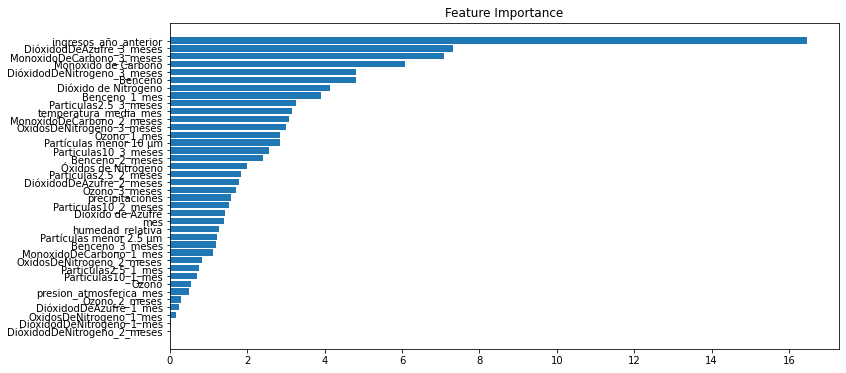

In [557]:
feature_importance = final_model_cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [558]:
pred3=final_model_cb.predict(X_train)
pred2=final_model_cb.predict(X_test)

In [559]:
mae_cb_train,mape_cb_train,rmse_cb_train=mean_absolute_error(pred3,y_train),mean_absolute_percentage_error(pred3,y_train),np.sqrt(mean_squared_error(pred3,y_train))
mae_cb_test,mape_cb_test,rmse_cb_test=mean_absolute_error(pred2,y_test),mean_absolute_percentage_error(pred2,y_test),np.sqrt(mean_squared_error(pred2,y_test))

In [560]:
errores_cb_train=[mae_cb_train,mape_cb_train,rmse_cb_train]
errores_cb_test=[mae_cb_test,mape_cb_test,rmse_cb_test]

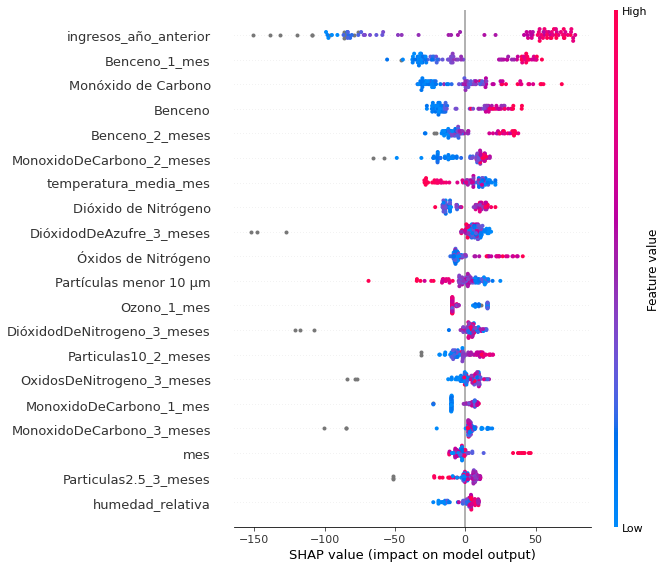

In [561]:
explainer = shap.TreeExplainer(final_model_cb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [562]:
df_num_ingresos['predicciones_cb']=final_model_cb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/281832746.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM

In [563]:
model3=LGBMRegressor()

In [564]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [565]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [566]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [567]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 20, 'learning_rate': 0.1},
 0.34606050840924396)

In [568]:
final_model_lgb=LGBMRegressor(**cv.best_params_)
final_model_lgb.fit(X_train,y_train)

LGBMRegressor(max_depth=20, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

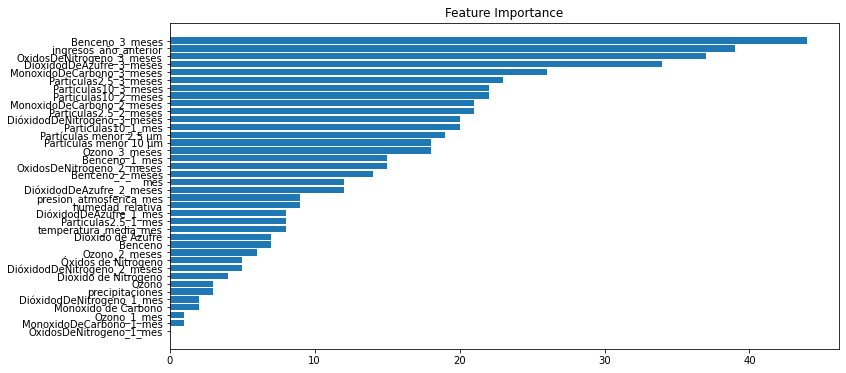

In [569]:
feature_importance = final_model_lgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [570]:
pred5=final_model_lgb.predict(X_train)
pred4=final_model_lgb.predict(X_test)

In [571]:
mae_lgb_train,mape_lgb_train,rmse_lgb_train=mean_absolute_error(pred5,y_train),mean_absolute_percentage_error(pred5,y_train),np.sqrt(mean_squared_error(pred5,y_train))
mae_lgb_test,mape_lgb_test,rmse_lgb_test=mean_absolute_error(pred4,y_test),mean_absolute_percentage_error(pred4,y_test),np.sqrt(mean_squared_error(pred4,y_test))

In [572]:
errores_lgb_train=[mae_lgb_train,mape_lgb_train,rmse_lgb_train]
errores_lgb_test=[mae_lgb_test,mape_lgb_test,rmse_lgb_test]

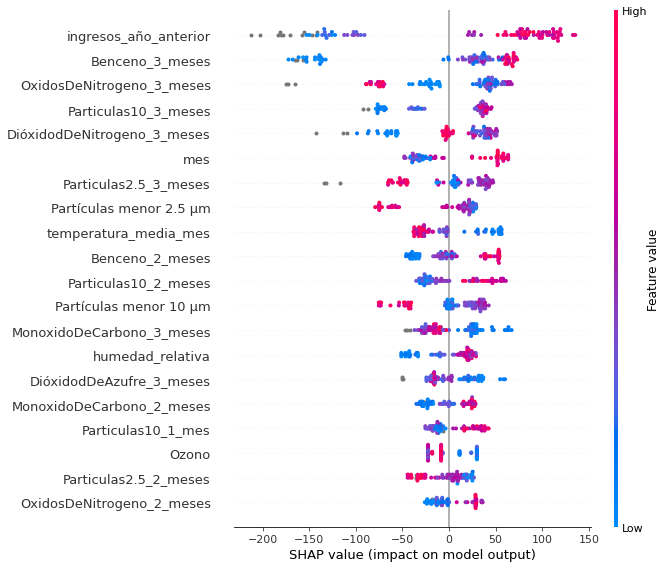

In [573]:
explainer = shap.TreeExplainer(final_model_lgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [574]:
df_errores_train=pd.DataFrame({'errores_xgb':errores_xgb_train,'errores_cb':errores_cb_train,'errores_lgb':errores_lgb_train},index=['MAE','MAPE','RMSE'])
df_errores_test=pd.DataFrame({'errores_xgb':errores_xgb_test,'errores_cb':errores_cb_test,'errores_lgb':errores_lgb_test},index=['MAE','MAPE','RMSE'])

In [575]:
df_num_ingresos['predicciones_lgbm']=final_model_lgb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/3366779243.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [576]:
px.line(df_num_ingresos,x='fecha',y=['predicciones_lgbm','predicciones_cb','predicciones_xgb','numero_de_ingresos'])

In [577]:
df_errores_train

errores_xgb  errores_cb  errores_lgb
MAE     82.974277   91.246026    35.933755
MAPE     0.063599    0.092150     0.055189
RMSE   101.674619  118.348127    48.998823

In [578]:
df_errores_test

errores_xgb  errores_cb  errores_lgb
MAE    123.565857  109.515548   102.986099
MAPE     0.093444    0.078898     0.068846
RMSE   158.276721  176.498634   141.116852

## Estimación por diagnosticos: Enfermedad pulmonar obstructiva crónica (epoc), asma (a) y neumonia bacteriana (nb)

## XGBoost para enfermedad pulmonar obstructiva cronica

In [579]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','epoc_año_anterior','mes']
columns_y='enfermedad pulmonar obstructiva cronica'

limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [580]:
df_num_ingresos_epoc=df_def_diagnosticos[['fecha','enfermedad pulmonar obstructiva cronica']]

In [581]:
df_num_ingresos_epoc.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2224907365.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [582]:
model1=XGBRegressor()

In [583]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [584]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [585]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [586]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1},
 0.43015950626647104)

In [587]:
final_model_xgb_epoc=XGBRegressor(**cv.best_params_)
final_model_xgb_epoc.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

[0]	validation_0-rmse:328.80789	validation_1-rmse:330.84946
[1]	validation_0-rmse:297.97946	validation_1-rmse:305.26883
[2]	validation_0-rmse:270.25665	validation_1-rmse:282.66840
[3]	validation_0-rmse:245.28104	validation_1-rmse:257.64770
[4]	validation_0-rmse:222.72147	validation_1-rmse:234.22827
[5]	validation_0-rmse:202.36469	validation_1-rmse:218.87247
[6]	validation_0-rmse:183.86879	validation_1-rmse:203.47111
[7]	validation_0-rmse:167.26181	validation_1-rmse:189.35620
[8]	validation_0-rmse:152.33524	validation_1-rmse:176.18195
[9]	validation_0-rmse:138.81015	validation_1-rmse:165.30417
[10]	validation_0-rmse:126.51415	validation_1-rmse:154.51955
[11]	validation_0-rmse:115.48071	validation_1-rmse:143.51382
[12]	validation_0-rmse:105.58540	validation_1-rmse:136.95538
[13]	validation_0-rmse:96.57355	validation_1-rmse:131.19040
[14]	validation_0-rmse:88.41831	validation_1-rmse:125.61164
[15]	validation_0-rmse:80.97936	validation_1-rmse:119.92316
[16]	validation_0-rmse:74.28199	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

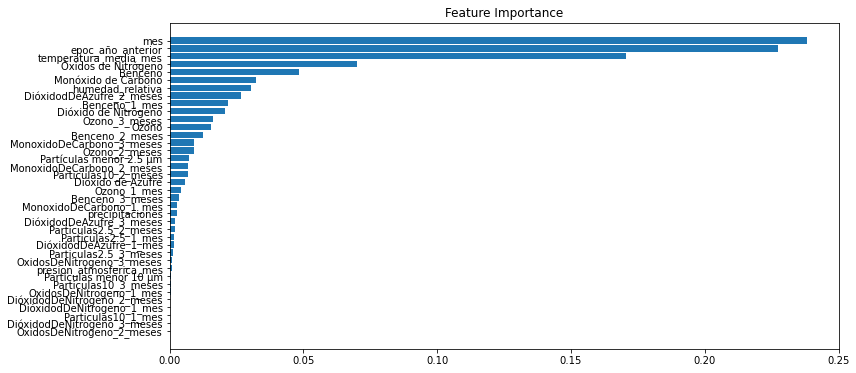

In [588]:
feature_importance = final_model_xgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



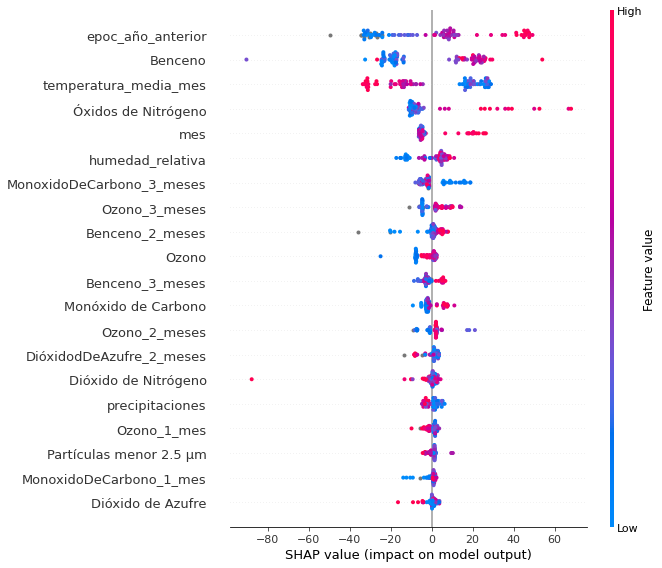

In [589]:
explainer = shap.TreeExplainer(final_model_xgb_epoc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [590]:
pred0_epoc=final_model_xgb_epoc.predict(X_train)
pred1_epoc=final_model_xgb_epoc.predict(X_test)

In [591]:
mae_xgb_epoc_train,mape_xgb_epoc_train,rmse_xgb_epoc_train=mean_absolute_error(pred0_epoc,y_train),mean_absolute_percentage_error(pred0_epoc,y_train),np.sqrt(mean_squared_error(pred0_epoc,y_train))
mae_xgb_epoc_test,mape_xgb_epoc_test,rmse_xgb_epoc_test=mean_absolute_error(pred1_epoc,y_test),mean_absolute_percentage_error(pred1_epoc,y_test),np.sqrt(mean_squared_error(pred1_epoc,y_test))

In [592]:
errores_xgb_epoc_train=[mae_xgb_epoc_train,mape_xgb_epoc_train,rmse_xgb_epoc_train]
errores_xgb_epoc_test=[mae_xgb_epoc_test,mape_xgb_epoc_test,rmse_xgb_epoc_test]

In [593]:
df_num_ingresos_epoc['predicciones_xgb']=final_model_xgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/4194797343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para enfermedad pulmonar obstructiva cronica

In [594]:
model2=CatBoostRegressor()

In [595]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [596]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [597]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.0611045   0.4410044   0.08709262  0.26105075  0.4304026  -0.24182274
         nan  0.3364769          nan         nan]



0:	learn: 103.3762406	total: 47.5ms	remaining: 9.45s
1:	learn: 98.8601718	total: 66ms	remaining: 6.54s
2:	learn: 95.9542596	total: 114ms	remaining: 7.5s
3:	learn: 92.3850857	total: 171ms	remaining: 8.4s
4:	learn: 89.1256780	total: 216ms	remaining: 8.43s
5:	learn: 85.9976418	total: 260ms	remaining: 8.41s
6:	learn: 83.3616918	total: 309ms	remaining: 8.52s
7:	learn: 80.3030726	total: 359ms	remaining: 8.61s
8:	learn: 77.4394966	total: 406ms	remaining: 8.63s
9:	learn: 74.9261914	total: 449ms	remaining: 8.52s
10:	learn: 72.3016479	total: 496ms	remaining: 8.53s
11:	learn: 69.3599921	total: 541ms	remaining: 8.48s
12:	learn: 67.1688824	total: 589ms	remaining: 8.47s
13:	learn: 64.8668205	total: 633ms	remaining: 8.41s
14:	learn: 63.1066748	total: 686ms	remaining: 8.47s
15:	learn: 61.0212477	total: 738ms	remaining: 8.49s
16:	learn: 59.3160241	total: 815ms	remaining: 8.78s
17:	learn: 57.6864873	total: 880ms	remaining: 8.9s
18:	learn: 55.8443568	total: 940ms	remaining: 8.96s
19:	learn: 53.8603223	to

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001ADA72C3760>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [598]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 200, 'depth': 10}, 0.4410043965110512)

In [599]:
final_model_cb_epoc=CatBoostRegressor(**cv.best_params_)
final_model_cb_epoc.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

0:	learn: 103.3762406	test: 103.3762406	test1: 86.5861705	best: 86.5861705 (0)	total: 60.9ms	remaining: 12.1s
1:	learn: 98.8601718	test: 98.8601718	test1: 82.1354479	best: 82.1354479 (1)	total: 96.4ms	remaining: 9.54s
2:	learn: 95.9542596	test: 95.9542596	test1: 81.3196910	best: 81.3196910 (2)	total: 143ms	remaining: 9.41s
3:	learn: 92.3850857	test: 92.3850857	test1: 80.2119980	best: 80.2119980 (3)	total: 187ms	remaining: 9.14s
4:	learn: 89.1256780	test: 89.1256780	test1: 79.3259980	best: 79.3259980 (4)	total: 233ms	remaining: 9.08s
5:	learn: 85.9976418	test: 85.9976418	test1: 76.7944587	best: 76.7944587 (5)	total: 276ms	remaining: 8.91s
6:	learn: 83.3616918	test: 83.3616918	test1: 75.4491087	best: 75.4491087 (6)	total: 327ms	remaining: 9.02s
7:	learn: 80.3030726	test: 80.3030726	test1: 73.9438751	best: 73.9438751 (7)	total: 372ms	remaining: 8.93s
8:	learn: 77.4394966	test: 77.4394966	test1: 72.9596875	best: 72.9596875 (8)	total: 419ms	remaining: 8.89s
9:	learn: 74.9261914	test: 74.926

Text(0.5, 1.0, 'Feature Importance')

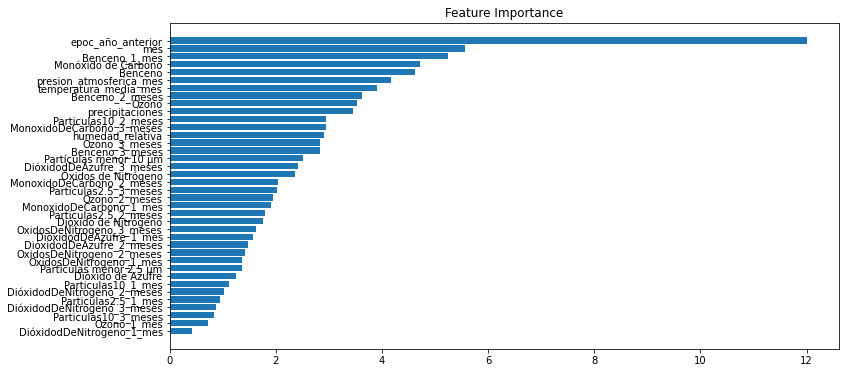

In [600]:
feature_importance = final_model_cb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

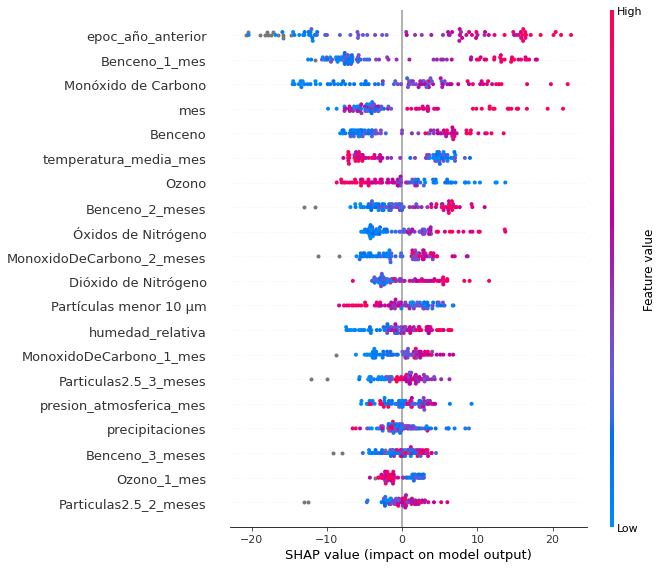

In [601]:
explainer = shap.TreeExplainer(final_model_cb_epoc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [602]:
pred3_epoc=final_model_cb_epoc.predict(X_train)
pred2_epoc=final_model_cb_epoc.predict(X_test)

In [603]:
mae_cb_epoc_train,mape_cb_epoc_train,rmse_cb_epoc_train=mean_absolute_error(pred3_epoc,y_train),mean_absolute_percentage_error(pred3_epoc,y_train),np.sqrt(mean_squared_error(pred3_epoc,y_train))
mae_cb_epoc_test,mape_cb_epoc_test,rmse_cb_epoc_test=mean_absolute_error(pred2_epoc,y_test),mean_absolute_percentage_error(pred2_epoc,y_test),np.sqrt(mean_squared_error(pred2_epoc,y_test))

In [604]:
errores_cb_epoc_train=[mae_cb_epoc_train,mape_cb_epoc_train,rmse_cb_epoc_train]
errores_cb_epoc_test=[mae_cb_epoc_test,mape_cb_epoc_test,rmse_cb_epoc_test]

In [605]:
df_num_ingresos_epoc['predicciones_cb']=final_model_cb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/3182482037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para enfermedad pulmonar obstructiva cronica

In [606]:
model3=LGBMRegressor()

In [607]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [608]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [609]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [610]:
cv.best_params_,cv.best_score_

({'num_iterations': 100, 'max_depth': 5, 'learning_rate': 0.1},
 0.4693472258496937)

In [611]:
final_model_lgb_epoc=LGBMRegressor(**cv.best_params_)
final_model_lgb_epoc.fit(X_train,y_train)

LGBMRegressor(max_depth=5, num_iterations=100)

Text(0.5, 1.0, 'Feature Importance')

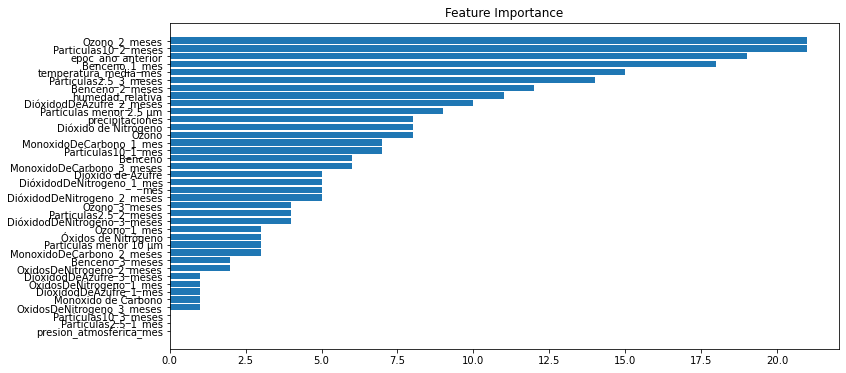

In [612]:
feature_importance = final_model_lgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

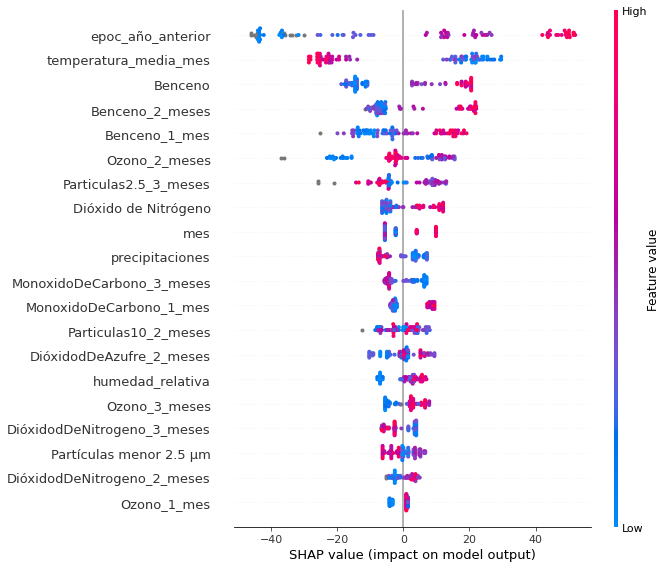

In [613]:
explainer = shap.TreeExplainer(final_model_lgb_epoc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [614]:
pred5_epoc=final_model_lgb_epoc.predict(X_train)
pred4_epoc=final_model_lgb_epoc.predict(X_test)

In [615]:
mae_lgb_epoc_train,mape_lgb_epoc_train,rmse_lgb_epoc_train=mean_absolute_error(pred5_epoc,y_train),mean_absolute_percentage_error(pred5_epoc,y_train),np.sqrt(mean_squared_error(pred5_epoc,y_train))
mae_lgb_epoc_test,mape_lgb_epoc_test,rmse_lgb_epoc_test=mean_absolute_error(pred4_epoc,y_test),mean_absolute_percentage_error(pred4_epoc,y_test),np.sqrt(mean_squared_error(pred4_epoc,y_test))

In [616]:
errores_lgb_epoc_train=[mae_lgb_epoc_train,mape_lgb_epoc_train,rmse_lgb_epoc_train]
errores_lgb_epoc_test=[mae_lgb_epoc_test,mape_lgb_epoc_test,rmse_lgb_epoc_test]

In [617]:
df_errores_epoc_train=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc_train,'errores_cb_epoc':errores_cb_epoc_train,'errores_lgb_epoc':errores_lgb_epoc_train},index=['MAE','MAPE','RMSE'])
df_errores_epoc_test=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc_test,'errores_cb_epoc':errores_cb_epoc_test,'errores_lgb_epoc':errores_lgb_epoc_test},index=['MAE','MAPE','RMSE'])

In [618]:
df_errores_epoc_train

errores_xgb_epoc  errores_cb_epoc  errores_lgb_epoc
MAE           0.856846        13.057256         13.945341
MAPE          0.002140         0.047738          0.048049
RMSE          2.121663        17.008831         21.388577

In [619]:
df_errores_epoc_test

errores_xgb_epoc  errores_cb_epoc  errores_lgb_epoc
MAE          56.794460        46.443523         46.897067
MAPE          0.165402         0.131998          0.135282
RMSE         83.315841        55.533159         58.850891

In [620]:
df_num_ingresos_epoc['predicciones_lgbm']=final_model_lgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2543625712.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [621]:
px.line(df_num_ingresos_epoc,x='fecha',y=['enfermedad pulmonar obstructiva cronica','predicciones_xgb',	'predicciones_cb',	'predicciones_lgbm'])

## XGBoost para neumonia bacteriana

In [622]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','nb_año_anterior','mes']
columns_y='neumonia bacteriana'

limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [623]:
df_num_ingresos_nb=df_def_diagnosticos[['fecha','neumonia bacteriana']]

In [624]:
df_num_ingresos_nb.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/2118254318.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [625]:
model1=XGBRegressor()

In [626]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [627]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [628]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [629]:
cv.best_params_,cv.best_score_

({'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1},
 0.11846380658175734)

In [630]:
final_model_xgb_nb=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_nb.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

[21:40:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:187.48399	validation_1-rmse:185.23694
[1]	validation_0-rmse:170.00267	validation_1-rmse:168.64711
[2]	validation_0-rmse:154.23610	validation_1-rmse:152.04533
[3]	validation_0-rmse:139.97563	validation_1-rmse:138.40134
[4]	validation_0-rmse:127.19072	validation_1-rmse:125.19151
[5]	validation_0-rmse:115.64311	validation_1-rmse:115.28968
[6]	validation_0-rmse:105.16715	validation_1-rmse:105.09232
[7]	validation_0-rmse:95.71003	validation_1-rmse:97.46997
[8]	validation_0-rmse:87.19346	validation_1-rmse:90.54225
[9]	validation_0-rmse:79.51166	validation_1-rmse:82.97206
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

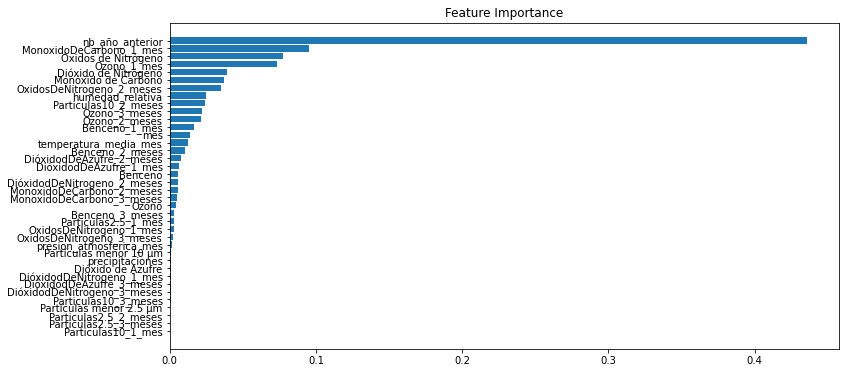

In [631]:
feature_importance = final_model_xgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



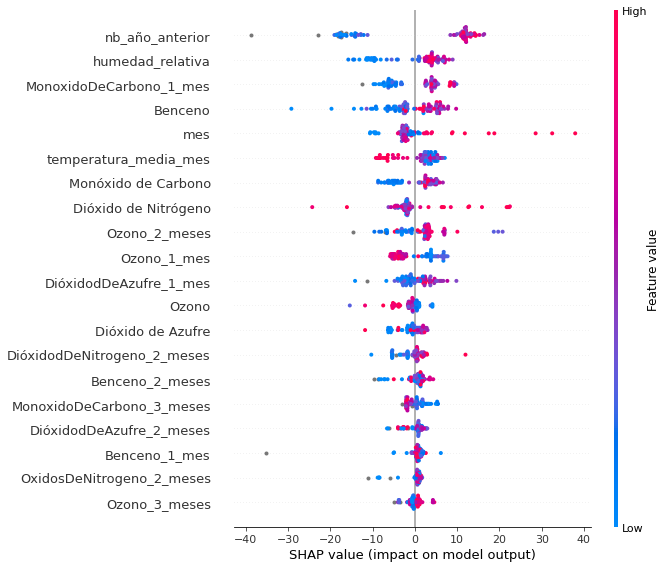

In [632]:
explainer = shap.TreeExplainer(final_model_xgb_nb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [633]:
pred0_nb=final_model_xgb_nb.predict(X_train)
pred1_nb=final_model_xgb_nb.predict(X_test)

In [634]:
mae_xgb_nb_train,mape_xgb_nb_train,rmse_xgb_nb_train=mean_absolute_error(pred0_nb,y_train),mean_absolute_percentage_error(pred0_nb,y_train),np.sqrt(mean_squared_error(pred0_nb,y_train))
mae_xgb_nb_test,mape_xgb_nb_test,rmse_xgb_nb_test=mean_absolute_error(pred1_nb,y_test),mean_absolute_percentage_error(pred1_nb,y_test),np.sqrt(mean_squared_error(pred1_nb,y_test))

In [635]:
errores_xgb_nb_train=[mae_xgb_nb_train,mape_xgb_nb_train,rmse_xgb_nb_train]
errores_xgb_nb_test=[mae_xgb_nb_test,mape_xgb_nb_test,rmse_xgb_nb_test]

In [636]:
df_num_ingresos_nb['predicciones_xgb']=final_model_xgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/685724751.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para neumonia bacteriana

In [637]:
model2=CatBoostRegressor()

In [638]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [639]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [640]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.36238254  0.21824587  0.37770066  0.15121997  0.15121997         nan
 -0.15688587 -0.1556542  -0.06716033         nan]



0:	learn: 56.5379336	total: 4.23ms	remaining: 841ms
1:	learn: 54.1549649	total: 9.05ms	remaining: 896ms
2:	learn: 51.8738725	total: 14.8ms	remaining: 972ms
3:	learn: 49.9393346	total: 19.6ms	remaining: 960ms
4:	learn: 48.0835949	total: 22.3ms	remaining: 871ms
5:	learn: 46.4193305	total: 28.5ms	remaining: 920ms
6:	learn: 44.4337620	total: 30.8ms	remaining: 850ms
7:	learn: 43.1438994	total: 33.3ms	remaining: 800ms
8:	learn: 41.8989798	total: 35.7ms	remaining: 758ms
9:	learn: 40.7926544	total: 38.2ms	remaining: 727ms
10:	learn: 39.4782278	total: 43.8ms	remaining: 753ms
11:	learn: 38.1846281	total: 48ms	remaining: 752ms
12:	learn: 37.2406578	total: 51.3ms	remaining: 738ms
13:	learn: 35.9776825	total: 58.5ms	remaining: 778ms
14:	learn: 35.0939153	total: 61.7ms	remaining: 761ms
15:	learn: 34.3383581	total: 66ms	remaining: 759ms
16:	learn: 33.4364242	total: 69.2ms	remaining: 745ms
17:	learn: 32.4472332	total: 75.2ms	remaining: 760ms
18:	learn: 31.4309479	total: 79.1ms	remaining: 753ms
19:	lea

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001ADA5C88640>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [641]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 200, 'depth': 5}, 0.3777006648595696)

In [642]:
final_model_cb_nb=CatBoostRegressor(**cv.best_params_)
final_model_cb_nb.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

0:	learn: 56.5379336	test: 56.5379336	test1: 54.0845318	best: 54.0845318 (0)	total: 6ms	remaining: 1.19s
1:	learn: 54.1549649	test: 54.1549649	test1: 51.3428882	best: 51.3428882 (1)	total: 11.8ms	remaining: 1.17s
2:	learn: 51.8738725	test: 51.8738725	test1: 49.7722580	best: 49.7722580 (2)	total: 18.9ms	remaining: 1.24s
3:	learn: 49.9393346	test: 49.9393346	test1: 47.8544506	best: 47.8544506 (3)	total: 26.5ms	remaining: 1.3s
4:	learn: 48.0835949	test: 48.0835949	test1: 46.4113720	best: 46.4113720 (4)	total: 32.7ms	remaining: 1.27s
5:	learn: 46.4193305	test: 46.4193305	test1: 44.3225669	best: 44.3225669 (5)	total: 38.8ms	remaining: 1.25s
6:	learn: 44.4337620	test: 44.4337620	test1: 42.2560786	best: 42.2560786 (6)	total: 43.5ms	remaining: 1.2s
7:	learn: 43.1438994	test: 43.1438994	test1: 41.2174754	best: 41.2174754 (7)	total: 49.8ms	remaining: 1.2s
8:	learn: 41.8989798	test: 41.8989798	test1: 40.3830290	best: 40.3830290 (8)	total: 56.9ms	remaining: 1.21s
9:	learn: 40.7926544	test: 40.7926

Text(0.5, 1.0, 'Feature Importance')

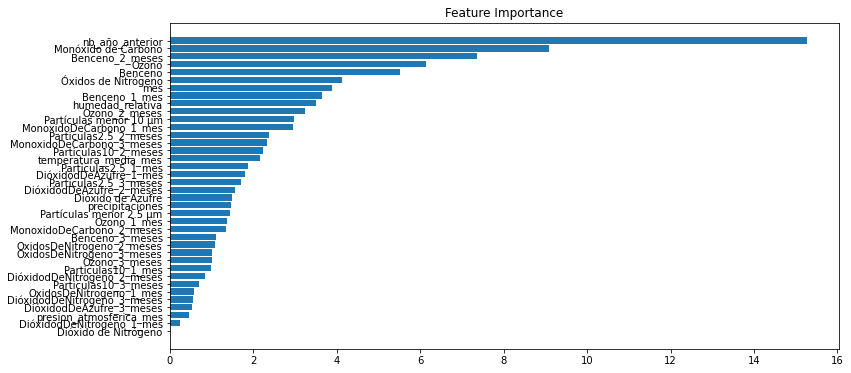

In [643]:
feature_importance = final_model_cb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

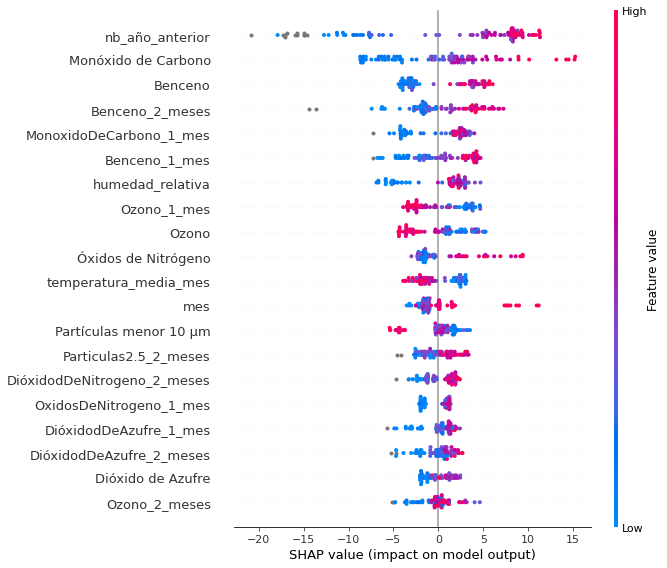

In [644]:
explainer = shap.TreeExplainer(final_model_cb_nb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [645]:
pred3_nb=final_model_cb_nb.predict(X_train)
pred2_nb=final_model_cb_nb.predict(X_test)

In [646]:
mae_cb_nb_train,mape_cb_nb_train,rmse_cb_nb_train=mean_absolute_error(pred3_nb,y_train),mean_absolute_percentage_error(pred3_nb,y_train),np.sqrt(mean_squared_error(pred3_nb,y_train))
mae_cb_nb_test,mape_cb_nb_test,rmse_cb_nb_test=mean_absolute_error(pred2_nb,y_test),mean_absolute_percentage_error(pred2_nb,y_test),np.sqrt(mean_squared_error(pred2_nb,y_test))

In [647]:
errores_cb_nb_train=[mae_cb_nb_train,mape_cb_nb_train,rmse_cb_nb_train]
errores_cb_nb_test=[mae_cb_nb_test,mape_cb_nb_test,rmse_cb_nb_test]

In [648]:
df_num_ingresos_nb['predicciones_cb']=final_model_cb_nb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/481367817.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para neumonia bacteriana

In [649]:
model3=LGBMRegressor()

In [650]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [651]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [652]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [653]:
cv.best_params_,cv.best_score_

({'num_iterations': 100, 'max_depth': 10, 'learning_rate': 0.01},
 0.24781291558694085)

In [654]:
final_model_lgb_nb=LGBMRegressor(**cv.best_params_)
final_model_lgb_nb.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_depth=10, num_iterations=100)

Text(0.5, 1.0, 'Feature Importance')

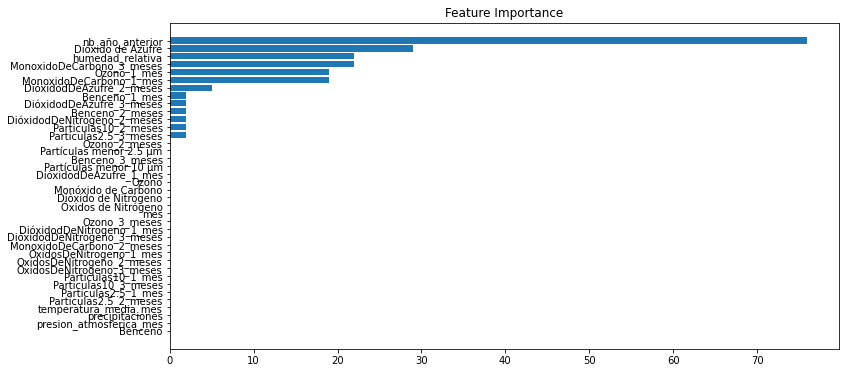

In [655]:
feature_importance = final_model_lgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

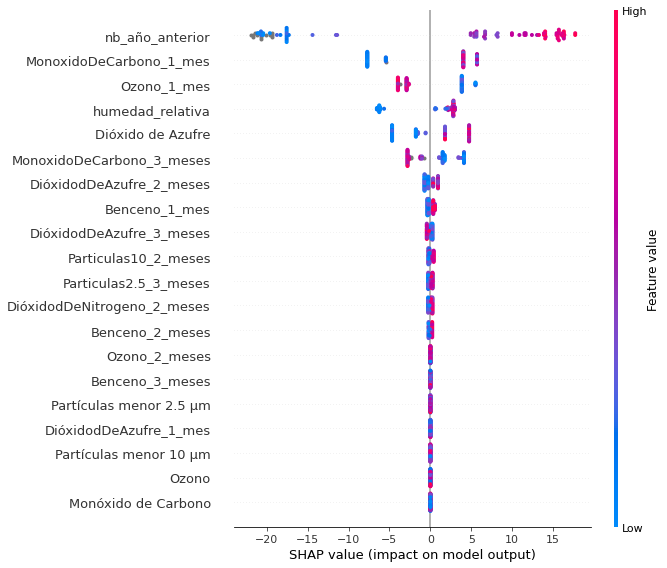

In [656]:
explainer = shap.TreeExplainer(final_model_lgb_nb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [657]:
pred5_nb=final_model_lgb_nb.predict(X_train)
pred4_nb=final_model_lgb_nb.predict(X_test)

In [658]:
mae_lgb_nb_train,mape_lgb_nb_train,rmse_lgb_nb_train=mean_absolute_error(pred5_nb,y_train),mean_absolute_percentage_error(pred5_nb,y_train),np.sqrt(mean_squared_error(pred5_nb,y_train))
mae_lgb_nb_test,mape_lgb_nb_test,rmse_lgb_nb_test=mean_absolute_error(pred4_nb,y_test),mean_absolute_percentage_error(pred4_nb,y_test),np.sqrt(mean_squared_error(pred4_nb,y_test))

In [659]:
errores_lgb_nb_train=[mae_lgb_nb_train,mape_lgb_nb_train,rmse_lgb_nb_train]
errores_lgb_nb_test=[mae_lgb_nb_test,mape_lgb_nb_test,rmse_lgb_nb_test]

In [660]:
df_errores_nb_train=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb_train,'errores_cb_nb':errores_cb_nb_train,'errores_lgb_nb':errores_lgb_nb_train},index=['MAE','MAPE','RMSE'])
df_errores_nb_test=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb_test,'errores_cb_nb':errores_cb_nb_test,'errores_lgb_nb':errores_lgb_nb_test},index=['MAE','MAPE','RMSE'])

In [661]:
df_errores_nb_train

errores_xgb_nb  errores_cb_nb  errores_lgb_nb
MAE         0.080375      13.660419       27.720889
MAPE        0.000308       0.077099        0.142440
RMSE        0.261391      17.986659       39.736212

In [662]:
df_errores_nb_test

errores_xgb_nb  errores_cb_nb  errores_lgb_nb
MAE        30.110635      24.663317       34.567687
MAPE        0.149137       0.125835        0.178369
RMSE       39.057365      29.578470       38.472600

In [663]:
df_num_ingresos_nb['predicciones_lgbm']=final_model_lgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/813005327.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [664]:
px.line(df_num_ingresos_nb,x='fecha',y=['neumonia bacteriana','predicciones_lgbm','predicciones_cb','predicciones_xgb'])

## XGBoost para asma

In [665]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','asma_año_anterior','mes']
columns_y='asma'


limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [666]:
df_num_ingresos_a=df_def_diagnosticos[['fecha','asma']]

In [667]:
df_num_ingresos_a.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/699617131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [668]:
model1=XGBRegressor()

In [669]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [670]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [671]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [672]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1},
 0.07601606165065367)

In [673]:
final_model_xgb_a=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_a.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

[21:42:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:98.70612	validation_1-rmse:100.31829
[1]	validation_0-rmse:89.74435	validation_1-rmse:90.84633
[2]	validation_0-rmse:81.68249	validation_1-rmse:82.83714
[3]	validation_0-rmse:74.41860	validation_1-rmse:75.91881
[4]	validation_0-rmse:67.80609	validation_1-rmse:69.02586
[5]	validation_0-rmse:61.86256	validation_1-rmse:63.38855
[6]	validation_0-rmse:56.48126	validation_1-rmse:58.34410
[7]	validation_0-rmse:51.63241	validation_1-rmse:53.71925
[8]	validation_0-rmse:47.26440	validation_1-rmse:48.71983
[9]	validation_0-rmse:43.30398	validation_1-rmse:45.26965
[10]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

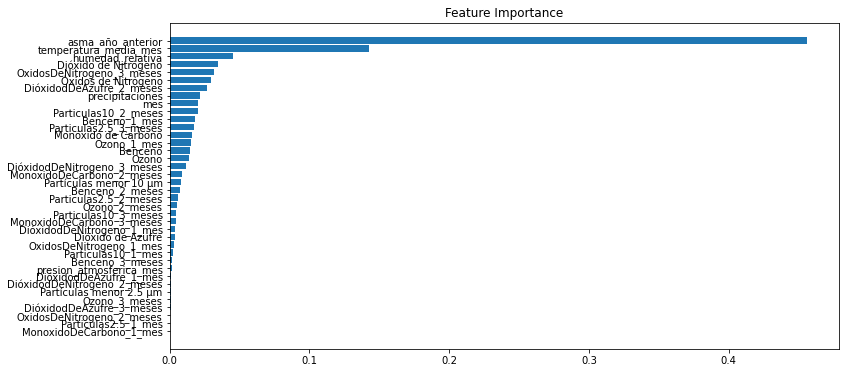

In [674]:
feature_importance = final_model_xgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



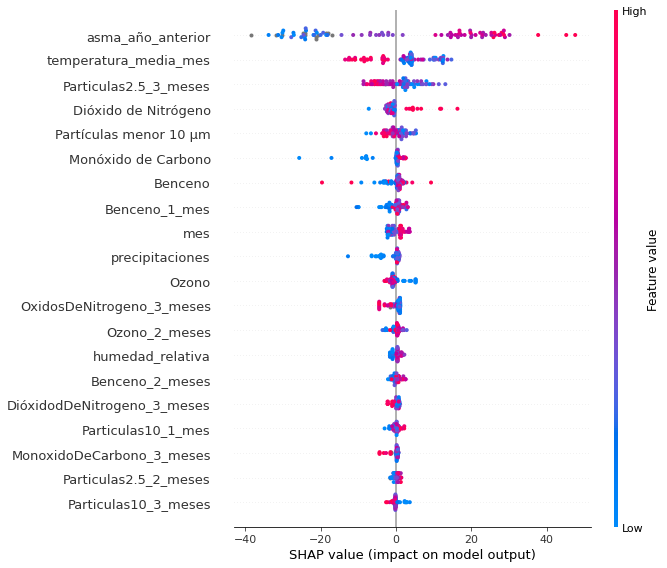

In [675]:
explainer = shap.TreeExplainer(final_model_xgb_a)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [676]:
pred0_a=final_model_xgb_a.predict(X_train)
pred1_a=final_model_xgb_a.predict(X_test)

In [677]:
mae_xgb_a_train,mape_xgb_a_train,rmse_xgb_a_train=mean_absolute_error(pred0_a,y_train),mean_absolute_percentage_error(pred0_a,y_train),np.sqrt(mean_squared_error(pred0_a,y_train))
mae_xgb_a_test,mape_xgb_a_test,rmse_xgb_a_test=mean_absolute_error(pred1_a,y_test),mean_absolute_percentage_error(pred1_a,y_test),np.sqrt(mean_squared_error(pred1_a,y_test))

In [678]:
errores_xgb_a_train=[mae_xgb_a_train,mape_xgb_a_train,rmse_xgb_a_train]
errores_xgb_a_test=[mae_xgb_a_test,mape_xgb_a_test,rmse_xgb_a_test]

In [679]:
df_num_ingresos_a['predicciones_xgb']=final_model_xgb_a.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/3420313306.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost para asma

In [680]:
model2=CatBoostRegressor()

In [681]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [682]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [683]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [        nan  0.13088875  0.27847227  0.25133514  0.19862194  0.24548613
 -0.21041953         nan  0.38100402         nan]



0:	learn: 37.2516871	total: 11.2ms	remaining: 1.11s
1:	learn: 35.9224562	total: 20.2ms	remaining: 992ms
2:	learn: 34.3036572	total: 27.5ms	remaining: 889ms
3:	learn: 32.8120475	total: 34.4ms	remaining: 827ms
4:	learn: 31.7262676	total: 41.7ms	remaining: 792ms
5:	learn: 30.4026510	total: 52.8ms	remaining: 827ms
6:	learn: 29.3682159	total: 60.4ms	remaining: 802ms
7:	learn: 28.5197336	total: 69.8ms	remaining: 803ms
8:	learn: 27.8098934	total: 78.7ms	remaining: 796ms
9:	learn: 26.9863185	total: 85.2ms	remaining: 766ms
10:	learn: 26.0287857	total: 92.8ms	remaining: 751ms
11:	learn: 25.1826282	total: 100ms	remaining: 733ms
12:	learn: 24.5409895	total: 120ms	remaining: 804ms
13:	learn: 23.7335731	total: 127ms	remaining: 782ms
14:	learn: 22.8869889	total: 141ms	remaining: 799ms
15:	learn: 22.2481662	total: 148ms	remaining: 775ms
16:	learn: 21.5535956	total: 165ms	remaining: 805ms
17:	learn: 20.8570455	total: 173ms	remaining: 788ms
18:	learn: 20.3122602	total: 202ms	remaining: 860ms
19:	learn: 

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001ADAA9311F0>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [684]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 100, 'depth': 5}, 0.38100402027890623)

In [685]:
final_model_cb_a=CatBoostRegressor(**cv.best_params_)
final_model_cb_a.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

0:	learn: 37.2516871	test: 37.2516871	test1: 35.9662287	best: 35.9662287 (0)	total: 10.1ms	remaining: 1s
1:	learn: 35.9224562	test: 35.9224562	test1: 34.7358681	best: 34.7358681 (1)	total: 16.9ms	remaining: 828ms
2:	learn: 34.3036572	test: 34.3036572	test1: 32.9041217	best: 32.9041217 (2)	total: 24.9ms	remaining: 806ms
3:	learn: 32.8120475	test: 32.8120475	test1: 31.3831887	best: 31.3831887 (3)	total: 35.4ms	remaining: 848ms
4:	learn: 31.7262676	test: 31.7262676	test1: 30.3390763	best: 30.3390763 (4)	total: 44ms	remaining: 836ms
5:	learn: 30.4026510	test: 30.4026510	test1: 29.3663703	best: 29.3663703 (5)	total: 50.6ms	remaining: 793ms
6:	learn: 29.3682159	test: 29.3682159	test1: 28.8561307	best: 28.8561307 (6)	total: 58ms	remaining: 770ms
7:	learn: 28.5197336	test: 28.5197336	test1: 28.2903926	best: 28.2903926 (7)	total: 64.2ms	remaining: 738ms
8:	learn: 27.8098934	test: 27.8098934	test1: 28.0539599	best: 28.0539599 (8)	total: 80.9ms	remaining: 818ms
9:	learn: 26.9863185	test: 26.98631

Text(0.5, 1.0, 'Feature Importance')

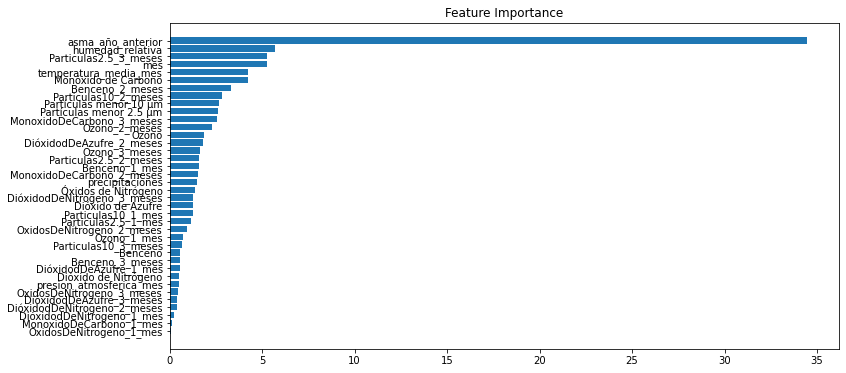

In [686]:
feature_importance = final_model_cb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

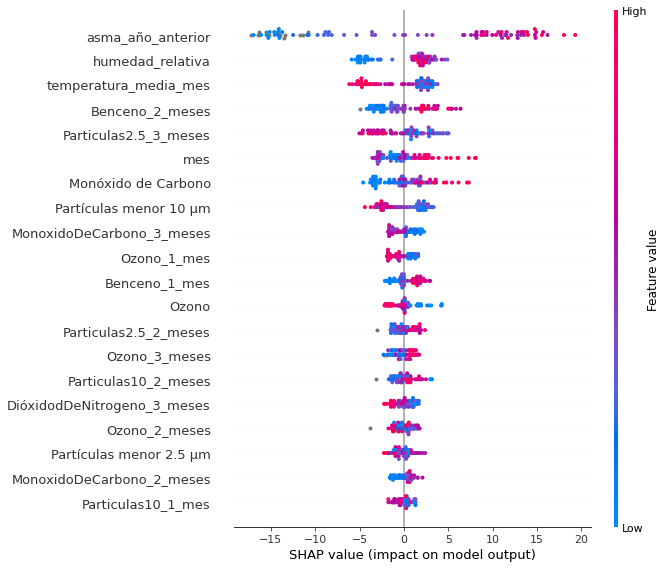

In [687]:
explainer = shap.TreeExplainer(final_model_cb_a)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [688]:
pred3_a=final_model_cb_a.predict(X_train)
pred2_a=final_model_cb_a.predict(X_test)

In [689]:
mae_cb_a_train,mape_cb_a_train,rmse_cb_a_train=mean_absolute_error(pred3_a,y_train),mean_absolute_percentage_error(pred3_a,y_train),np.sqrt(mean_squared_error(pred3_a,y_train))
mae_cb_a_test,mape_cb_a_test,rmse_cb_a_test=mean_absolute_error(pred2_a,y_test),mean_absolute_percentage_error(pred2_a,y_test),np.sqrt(mean_squared_error(pred2_a,y_test))

In [690]:
errores_cb_a_train=[mae_cb_a_train,mape_cb_a_train,rmse_cb_a_train]
errores_cb_a_test=[mae_cb_a_test,mape_cb_a_test,rmse_cb_a_test]

In [691]:
df_num_ingresos_a['predicciones_cb']=final_model_cb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/1054010735.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para asma

In [692]:
model3=LGBMRegressor()

In [693]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [694]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [695]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [696]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 20, 'learning_rate': 1},
 0.4461828847487924)

In [697]:
final_model_lgb_a=LGBMRegressor(**cv.best_params_)
final_model_lgb_a.fit(X_train,y_train)

LGBMRegressor(learning_rate=1, max_depth=20, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

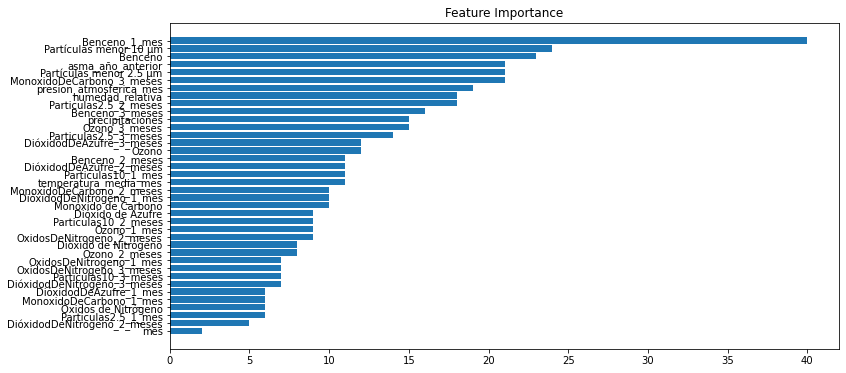

In [698]:
feature_importance = final_model_lgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

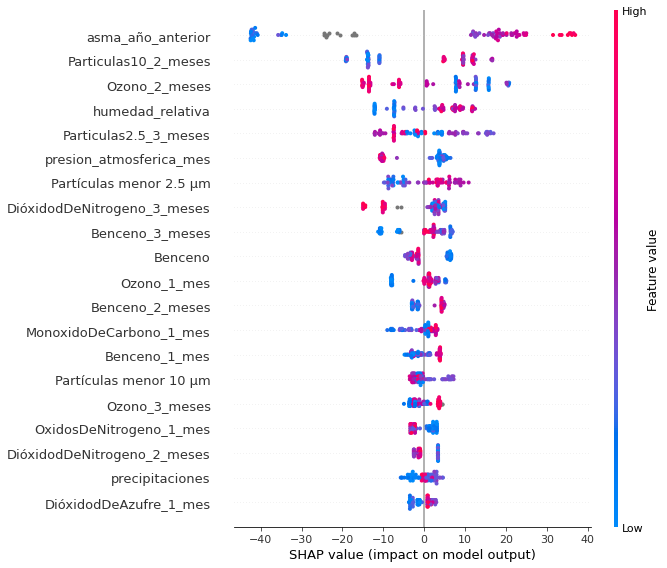

In [699]:
explainer = shap.TreeExplainer(final_model_lgb_a)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [700]:
pred5_a=final_model_lgb_a.predict(X_train)
pred4_a=final_model_lgb_a.predict(X_test)

In [701]:
mae_lgb_a_train,mape_lgb_a_train,rmse_lgb_a_train=mean_absolute_error(pred5_a,y_train),mean_absolute_percentage_error(pred5_a,y_train),np.sqrt(mean_squared_error(pred5_a,y_train))
mae_lgb_a_test,mape_lgb_a_test,rmse_lgb_a_test=mean_absolute_error(pred4_a,y_test),mean_absolute_percentage_error(pred4_a,y_test),np.sqrt(mean_squared_error(pred4_a,y_test))

In [702]:
errores_lgb_a_train=[mae_lgb_a_train,mape_lgb_a_train,rmse_lgb_a_train]
errores_lgb_a_test=[mae_lgb_a_test,mape_lgb_a_test,rmse_lgb_a_test]

In [703]:
df_errores_a_train=pd.DataFrame({'errores_xgb_a':errores_xgb_a_train,'errores_cb_a':errores_cb_a_train,'errores_lgb_a':errores_lgb_a_train},index=['MAE','MAPE','RMSE'])
df_errores_a_test=pd.DataFrame({'errores_xgb_a':errores_xgb_a_test,'errores_cb_a':errores_cb_a_test,'errores_lgb_a':errores_lgb_a_test},index=['MAE','MAPE','RMSE'])

In [704]:
df_errores_a_train

errores_xgb_a  errores_cb_a  errores_lgb_a
MAE        3.516383      7.641789       0.010934
MAPE       0.032248      0.085172       0.000130
RMSE       5.460010     10.027377       0.016691

In [705]:
df_errores_a_test

errores_xgb_a  errores_cb_a  errores_lgb_a
MAE       16.160957     15.561193      24.260538
MAPE       0.171704      0.168330       0.454891
RMSE      18.788734     17.909886      29.903092

In [706]:
df_num_ingresos_a['predicciones_lgbm']=final_model_lgb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_8296/3624501283.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [707]:
px.line(df_num_ingresos_a,x='fecha',y=['asma','predicciones_lgbm','predicciones_cb','predicciones_xgb'])